In [1]:
%matplotlib inline
from joblib import dump
import os
from scipy.io import loadmat
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from sklearn import metrics
from collections import defaultdict
from sklearn.preprocessing import minmax_scale
from sklearn.linear_model import LogisticRegression
import sys
import numpy as np
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

In [2]:
x = loadmat('../data/arrhythmia.mat')

In [3]:
def generate_sample_w_replacement(size, n_splits, ratio=1/np.exp(0)):
    idx=0
    splits=[]
    while idx < n_splits:
        sample = np.random.choice(range(0, size), size=int(size*(1/np.exp(0))))
        test = list(set(range(0, size)).difference(sample))
        splits.append((sample, np.array(test)))
        idx+=1
        
    return splits
    

## Logistic Regression classifier

In [28]:
labels=x['y'].flatten()
number_of_models = 500

# Logitic Regression bootstrapping
results_pd=pd.DataFrame()
metrics_pd=pd.DataFrame()
auc_dict={}
results_pd['y']=pd.Series(labels)
auc_classifier_feature={}
for feature_index in range(x['X'].shape[1]):
#for feature_index in [0]:
    target=x['X'][:, feature_index]
    copy=x['X']
    data=np.delete(copy, [feature_index], axis=1)
    
    bins=10
    target = np.digitize(target, bins=np.histogram(target, bins=bins)[1])
    y_map={value: list(set(target.flatten())).index(value)  for value in set(target.flatten())}
    outcomes=defaultdict()
    for key in range(data.shape[0]):
        outcomes[key]=list() 
    rkf = generate_sample_w_replacement(labels.shape[0], number_of_models)
    for train, test in rkf:
        if np.unique(target[train]).shape[0] == np.unique(target).shape[0] and np.unique(target[train]).shape[0] >1:

            clf = LogisticRegression(random_state=0, solver='lbfgs',
                                     multi_class='multinomial').fit(data[train], target[train])

            decision=clf.predict(data[test]) 
            for number, idx in enumerate(test):
                outcomes[idx].append(decision[number])
    
    if np.array(prob).shape[0] == target.shape[0]:
        prob=[[outcomes[key].count(value)/float(len(outcomes[key])) for value in range(1, max(np.unique(target))+1)]
              for key in range(data.shape[0]) if len(outcomes.get(key))>0]


        corresponding_prob = np.array([np.array(prob)[idx][[value-1]] for idx, value in enumerate(target)]).flatten()

        num_classes=np.unique(target).shape[0]
        if num_classes>1:
            max_entropy = np.log(num_classes)
        else:
            max_entropy = 1

        entropy = np.array([sum([-value*np.log(value+10**(-8)) for value in ls]) for ls in prob])/max_entropy
        fpr, tpr, thresholds = metrics.roc_curve(results_pd['y'], entropy, pos_label=1)

        auc_value = metrics.auc(fpr, tpr)
        auc_classifier_feature[feature_index]=auc_value

        results_pd["prob_{}".format(feature_index)]=pd.Series(corresponding_prob)
        results_pd["entropy_{}".format(feature_index)]=pd.Series(entropy)
        plt.scatter(results_pd[results_pd.y!=1]["prob_{}".format(feature_index)], 
                    results_pd[results_pd.y!=1]["entropy_{}".format(feature_index)], marker='.', color='b',
                    label="0")
        plt.scatter(results_pd[results_pd.y==1]["prob_{}".format(feature_index)], 
                    results_pd[results_pd.y==1]["entropy_{}".format(feature_index)],
                    marker='.', color='r', label="1")
        plt.legend()
        plt.xlabel('Probability of true class')
        plt.ylabel("Scaled entropy")
        auc_value = metrics.auc(fpr, tpr)
        plt.title("Feature: {} AUC: {:.2f}".format(feature_index, auc_value))
        plt.show()

KeyError: "['entropy_0' 'entropy_1' 'entropy_2' 'entropy_3' 'entropy_4' 'entropy_5'\n 'entropy_6' 'entropy_7' 'entropy_8' 'entropy_9' 'entropy_10' 'entropy_11'\n 'entropy_12' 'entropy_13' 'entropy_14' 'entropy_15' 'entropy_16'\n 'entropy_17' 'entropy_18' 'entropy_19' 'entropy_20' 'entropy_21'\n 'entropy_22' 'entropy_23' 'entropy_24' 'entropy_25' 'entropy_26'\n 'entropy_27' 'entropy_28' 'entropy_29' 'entropy_30' 'entropy_31'\n 'entropy_32' 'entropy_33' 'entropy_34' 'entropy_35' 'entropy_36'\n 'entropy_37' 'entropy_38' 'entropy_39' 'entropy_40' 'entropy_41'\n 'entropy_42' 'entropy_43' 'entropy_44' 'entropy_45' 'entropy_46'\n 'entropy_47' 'entropy_48' 'entropy_49' 'entropy_50' 'entropy_51'\n 'entropy_52' 'entropy_53' 'entropy_54' 'entropy_55' 'entropy_56'\n 'entropy_57' 'entropy_58' 'entropy_59' 'entropy_60' 'entropy_61'\n 'entropy_62' 'entropy_63' 'entropy_64' 'entropy_65' 'entropy_66'\n 'entropy_67' 'entropy_68' 'entropy_69' 'entropy_70' 'entropy_71'\n 'entropy_72' 'entropy_73' 'entropy_74' 'entropy_75' 'entropy_76'\n 'entropy_77' 'entropy_78' 'entropy_79' 'entropy_80' 'entropy_81'\n 'entropy_82' 'entropy_83' 'entropy_84' 'entropy_85' 'entropy_86'\n 'entropy_87' 'entropy_88' 'entropy_89' 'entropy_90' 'entropy_91'\n 'entropy_92' 'entropy_93' 'entropy_94' 'entropy_95' 'entropy_96'\n 'entropy_97' 'entropy_98' 'entropy_99' 'entropy_100' 'entropy_101'\n 'entropy_102' 'entropy_103' 'entropy_104' 'entropy_105' 'entropy_106'\n 'entropy_107' 'entropy_108' 'entropy_109' 'entropy_110' 'entropy_111'\n 'entropy_112' 'entropy_113' 'entropy_114' 'entropy_115' 'entropy_116'\n 'entropy_117' 'entropy_118' 'entropy_119' 'entropy_120' 'entropy_121'\n 'entropy_122' 'entropy_123' 'entropy_124' 'entropy_125' 'entropy_126'\n 'entropy_127' 'entropy_128' 'entropy_129' 'entropy_130' 'entropy_131'\n 'entropy_132' 'entropy_133' 'entropy_134' 'entropy_135' 'entropy_136'\n 'entropy_137' 'entropy_138' 'entropy_139' 'entropy_140' 'entropy_141'\n 'entropy_142' 'entropy_143' 'entropy_144' 'entropy_145' 'entropy_146'\n 'entropy_147' 'entropy_148' 'entropy_149' 'entropy_150' 'entropy_151'\n 'entropy_152' 'entropy_153' 'entropy_154' 'entropy_155' 'entropy_156'\n 'entropy_157' 'entropy_158' 'entropy_159' 'entropy_160' 'entropy_161'\n 'entropy_162' 'entropy_163' 'entropy_164' 'entropy_165' 'entropy_166'\n 'entropy_167' 'entropy_168' 'entropy_169' 'entropy_170' 'entropy_171'\n 'entropy_172' 'entropy_173' 'entropy_174' 'entropy_175' 'entropy_176'\n 'entropy_177' 'entropy_178' 'entropy_179' 'entropy_180' 'entropy_181'\n 'entropy_182' 'entropy_183' 'entropy_184' 'entropy_185' 'entropy_186'\n 'entropy_187' 'entropy_188' 'entropy_189' 'entropy_190' 'entropy_191'\n 'entropy_192' 'entropy_193' 'entropy_194' 'entropy_195' 'entropy_196'\n 'entropy_197' 'entropy_198' 'entropy_199' 'entropy_200' 'entropy_201'\n 'entropy_202' 'entropy_203' 'entropy_204' 'entropy_205' 'entropy_206'\n 'entropy_207' 'entropy_208' 'entropy_209' 'entropy_210' 'entropy_211'\n 'entropy_212' 'entropy_213' 'entropy_214' 'entropy_215' 'entropy_216'\n 'entropy_217' 'entropy_218' 'entropy_219' 'entropy_220' 'entropy_221'\n 'entropy_222' 'entropy_223' 'entropy_224' 'entropy_225' 'entropy_226'\n 'entropy_227' 'entropy_228' 'entropy_229' 'entropy_230' 'entropy_231'\n 'entropy_232' 'entropy_233' 'entropy_234' 'entropy_235' 'entropy_236'\n 'entropy_237' 'entropy_238' 'entropy_239' 'entropy_240' 'entropy_241'\n 'entropy_242' 'entropy_243' 'entropy_244' 'entropy_245' 'entropy_246'\n 'entropy_247' 'entropy_248' 'entropy_249' 'entropy_250' 'entropy_251'\n 'entropy_252' 'entropy_253' 'entropy_254' 'entropy_255' 'entropy_256'\n 'entropy_257' 'entropy_258' 'entropy_259' 'entropy_260' 'entropy_261'\n 'entropy_262' 'entropy_263' 'entropy_264' 'entropy_265' 'entropy_266'\n 'entropy_267' 'entropy_268' 'entropy_269' 'entropy_270' 'entropy_271'\n 'entropy_272' 'entropy_273'] not in index"

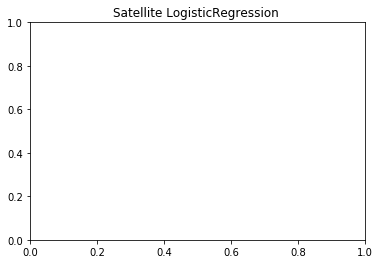

In [29]:
model_type="LogisticRegression"
columns_list_entropy=["entropy_{}".format(index) for index in range(x['X'].shape[1])]
plt.title("Satellite {} ".format(model_type))
results_pd['entropy_sum']=(results_pd[columns_list_entropy]).sum(axis=1)/x['X'].shape[1]

abs_diff_harmonic=results_pd[columns_list_entropy].apply(np.log).sum(skipna=True, axis=1).replace(-np.inf, -1000).replace(np.inf, 1000)
results_pd['entropy_agg_harmonic_sum']=pd.Series(minmax_scale(abs_diff_harmonic.values))
fpr, tpr, thresholds = metrics.roc_curve(labels, results_pd['entropy_sum'], pos_label=1)
plt.plot(fpr, tpr, lw=1, label="Entropy AUC:{:.3}".format(metrics.auc(fpr, tpr)), color='C{}'.format(2))
plt.legend()
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(labels, results_pd['entropy_agg_harmonic_sum'], pos_label=1)
plt.plot(fpr, tpr, lw=1, label="Entropy harm AUC:{:.3}".format(metrics.auc(fpr, tpr)), color='C{}'.format(2))
plt.legend()
plt.show()

## Support vector machines classifier

In [ ]:
labels=x['y'].flatten()
number_of_models = 500

# Logitic Regression bootstrapping
results_pd=pd.DataFrame()
metrics_pd=pd.DataFrame()
auc_dict={}
results_pd['y']=pd.Series(labels)
for feature_index in range(x['X'].shape[1]):
#for feature_index in [0]:
    target=x['X'][:, feature_index]
    copy=x['X']
    data=np.delete(copy, [feature_index], axis=1)
    
    bins=10
    target = np.digitize(target, bins=np.histogram(target, bins=bins)[1])
    y_map={value: list(set(target.flatten())).index(value)  for value in set(target.flatten())}
    outcomes=defaultdict()
    for key in range(data.shape[0]):
        outcomes[key]=list() 
    rkf = generate_sample_w_replacement(labels.shape[0], number_of_models)
    for train, test in rkf:

        clf = svm.SVC().fit(data[train], target[train])

        decision=clf.predict(data[test]) 
        for number, idx in enumerate(test):
            outcomes[idx].append(decision[number])
    
    
    prob=[[outcomes[key].count(value)/float(len(outcomes[key])) for value in range(1, max(np.unique(target))+1)]
          for key in range(data.shape[0])]


    corresponding_prob = np.array([np.array(prob)[idx][[value-1]] for idx, value in enumerate(target)]).flatten()

    num_classes=np.unique(target).shape[0]
    if num_classes>1:
        max_entropy = np.log(num_classes)
    else:
        max_entropy = 1
        
    entropy = np.array([sum([-value*np.log(value+10**(-8)) for value in ls]) for ls in prob])/max_entropy

    results_pd["prob_{}".format(feature_index)]=pd.Series(corresponding_prob)
    results_pd["entropy_{}".format(feature_index)]=pd.Series(entropy)
    plt.scatter(results_pd[results_pd.y!=1]["prob_{}".format(feature_index)], 
                results_pd[results_pd.y!=1]["entropy_{}".format(feature_index)], marker='.', color='b',
                label="0")
    plt.scatter(results_pd[results_pd.y==1]["prob_{}".format(feature_index)], 
                results_pd[results_pd.y==1]["entropy_{}".format(feature_index)],
                marker='.', color='r', label="1")
    plt.legend()
    plt.xlabel('Probability of true class')
    plt.ylabel("Scaled entropy")
    plt.title("Feature: {} AUC: {:.2f}".format(feature_index, auc_value))
    plt.show()

In [ ]:
columns_list_entropy=["entropy_{}".format(index) for index in range(x['X'].shape[1])]
plt.title("Satellite {} ".format(model_type))
results_pd['entropy_sum']=(results_pd[columns_list_entropy]).sum(axis=1)/x['X'].shape[1]

abs_diff_harmonic=results_pd[columns_list_entropy].apply(np.log).sum(skipna=True, axis=1).replace(-np.inf, -1000).replace(np.inf, 1000)
results_pd['entropy_agg_harmonic_sum']=pd.Series(minmax_scale(abs_diff_harmonic.values))
fpr, tpr, thresholds = metrics.roc_curve(labels, results_pd['entropy_sum'], pos_label=1)
plt.plot(fpr, tpr, lw=1, label="Entropy AUC:{:.3}".format(metrics.auc(fpr, tpr)), color='C{}'.format(2))
plt.legend()
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(labels, results_pd['entropy_agg_harmonic_sum'], pos_label=1)
plt.plot(fpr, tpr, lw=1, label="Entropy harm AUC:{:.3}".format(metrics.auc(fpr, tpr)), color='C{}'.format(2))
plt.legend()
plt.show()

## GradientBoostingClassifier

In [ ]:
labels=x['y'].flatten()
number_of_models = 500

# Logitic Regression bootstrapping
results_pd=pd.DataFrame()
metrics_pd=pd.DataFrame()
auc_dict={}
results_pd['y']=pd.Series(labels)
for feature_index in range(x['X'].shape[1]):
#for feature_index in [0]:
    target=x['X'][:, feature_index]
    copy=x['X']
    data=np.delete(copy, [feature_index], axis=1)
    
    bins=10
    target = np.digitize(target, bins=np.histogram(target, bins=bins)[1])
    y_map={value: list(set(target.flatten())).index(value)  for value in set(target.flatten())}
    outcomes=defaultdict()
    for key in range(data.shape[0]):
        outcomes[key]=list() 
    rkf = generate_sample_w_replacement(labels.shape[0], number_of_models)
    for train, test in rkf:

        clf = GradientBoostingClassifier(n_estimators=10).fit(data[train], target[train])

        decision=clf.predict(data[test]) 
        for number, idx in enumerate(test):
            outcomes[idx].append(decision[number])
    
    
    prob=[[outcomes[key].count(value)/float(len(outcomes[key])) for value in range(1, max(np.unique(target))+1)]
          for key in range(data.shape[0])]


    corresponding_prob = np.array([np.array(prob)[idx][[value-1]] for idx, value in enumerate(target)]).flatten()

    num_classes=np.unique(target).shape[0]
    if num_classes>1:
        max_entropy = np.log(num_classes)
    else:
        max_entropy = 1
        
    entropy = np.array([sum([-value*np.log(value+10**(-8)) for value in ls]) for ls in prob])/max_entropy

    results_pd["prob_{}".format(feature_index)]=pd.Series(corresponding_prob)
    results_pd["entropy_{}".format(feature_index)]=pd.Series(entropy)
    plt.scatter(results_pd[results_pd.y!=1]["prob_{}".format(feature_index)], 
                results_pd[results_pd.y!=1]["entropy_{}".format(feature_index)], marker='.', color='b',
                label="0")
    plt.scatter(results_pd[results_pd.y==1]["prob_{}".format(feature_index)], 
                results_pd[results_pd.y==1]["entropy_{}".format(feature_index)],
                marker='.', color='r', label="1")
    plt.legend()
    plt.xlabel('Probability of true class')
    plt.ylabel("Scaled entropy")
    plt.title("Feature: {} AUC: {:.2f} OOB score {:.2f}".format(feature_index, auc_value, oob_score))
    oob_scores_dict[feature_index] = oob_score
    results_dict[feature_index] = results_pd
    plt.show()

In [ ]:
columns_list_entropy=["entropy_{}".format(index) for index in range(x['X'].shape[1])]
plt.title("Satellite {} ".format(model_type))
results_pd['entropy_sum']=(results_pd[columns_list_entropy]).sum(axis=1)/x['X'].shape[1]

abs_diff_harmonic=results_pd[columns_list_entropy].apply(np.log).sum(skipna=True, axis=1).replace(-np.inf, -1000).replace(np.inf, 1000)
results_pd['entropy_agg_harmonic_sum']=pd.Series(minmax_scale(abs_diff_harmonic.values))
fpr, tpr, thresholds = metrics.roc_curve(labels, results_pd['entropy_sum'], pos_label=1)
plt.plot(fpr, tpr, lw=1, label="Entropy AUC:{:.3}".format(metrics.auc(fpr, tpr)), color='C{}'.format(2))
plt.legend()
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(labels, results_pd['entropy_agg_harmonic_sum'], pos_label=1)
plt.plot(fpr, tpr, lw=1, label="Entropy harm AUC:{:.3}".format(metrics.auc(fpr, tpr)), color='C{}'.format(2))
plt.legend()
plt.show()

In [ ]:
IF = IsolationForest(n_jobs=-1, max_samples=0.9, bootstrap=True)
if_pred=IF.fit(data)
fpr, tpr, thresholds =  metrics.roc_curve(x['y'].flatten(), -(IF.decision_function(x['X'])+0.5), pos_label=1)

plt.title("Satellite IF ")
plt.plot(fpr, tpr, lw=1, label="Entropy AUC:{:.3}".format(metrics.auc(fpr, tpr)), color='C{}'.format(2))
plt.legend()

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
IF = IsolationForest(n_jobs=-1, max_samples=0.9)
if_pred=IF.fit(data_pd)
fpr, tpr, thresholds = metrics.roc_curve(labels, if_pred.decision_function(data_pd)*(-1), pos_label=1)
plt.title("Iopnosphere {} ".format(model_type))
plt.plot(fpr, tpr, lw=1, label="Entropy AUC:{:.3}".format(metrics.auc(fpr, tpr)), color='C{}'.format(2))
plt.legend()

## Decision Trees

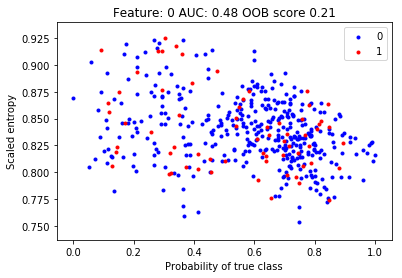

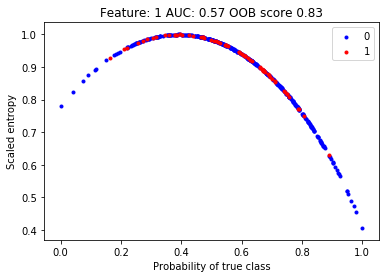

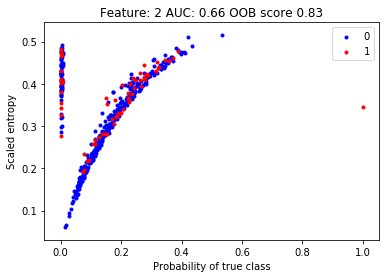

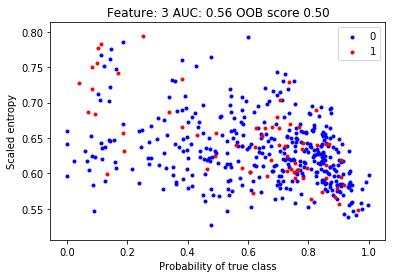

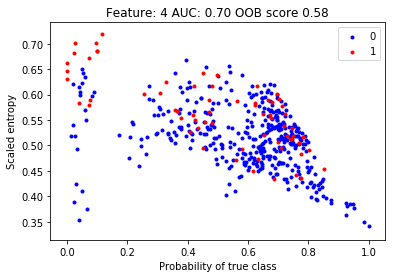

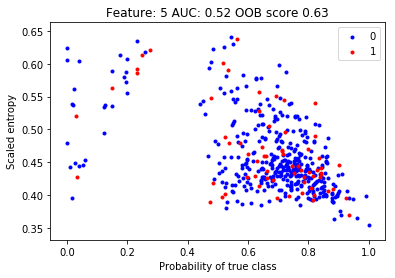

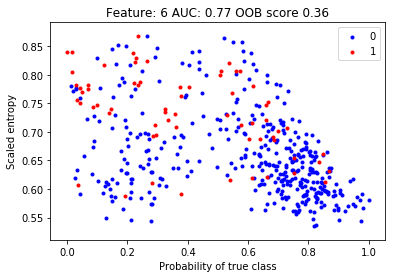

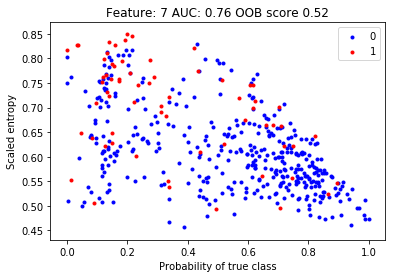

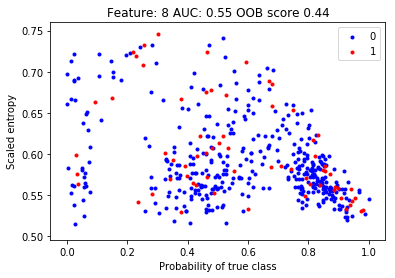

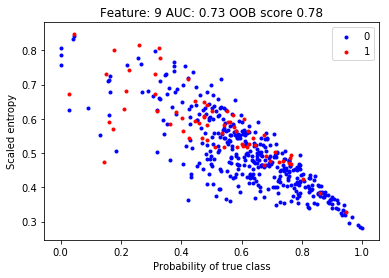

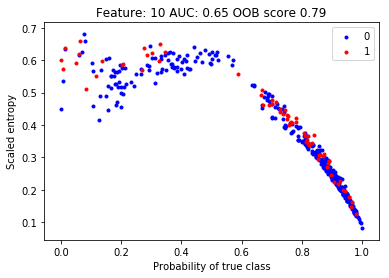

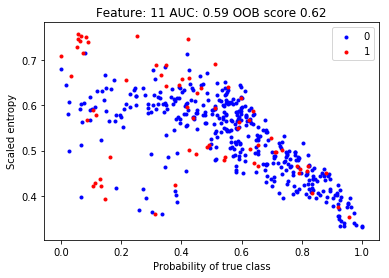

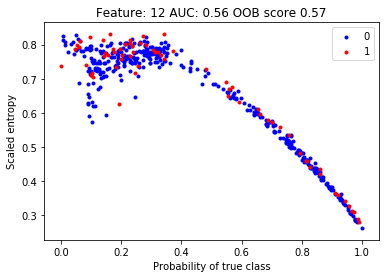

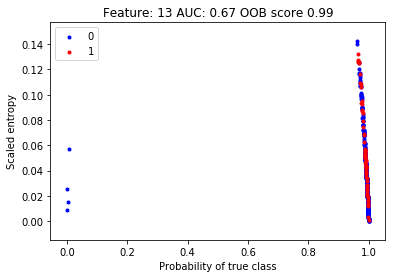

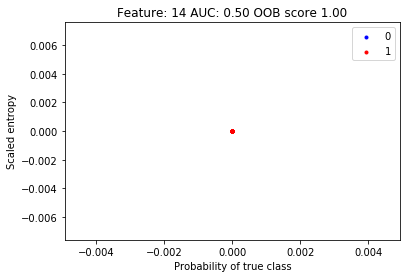

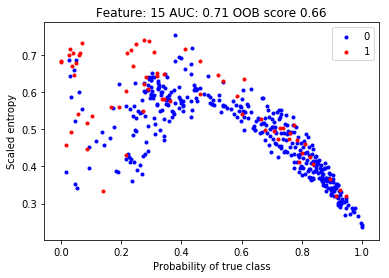

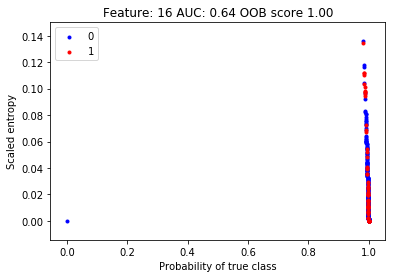

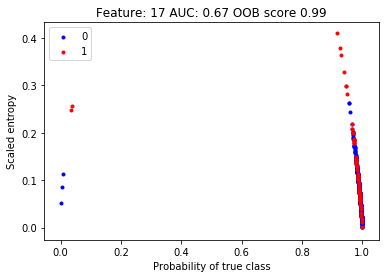

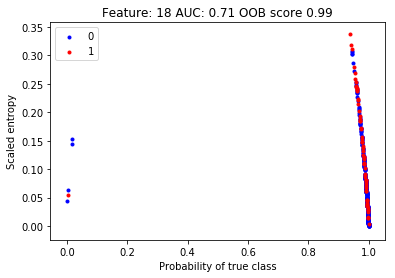

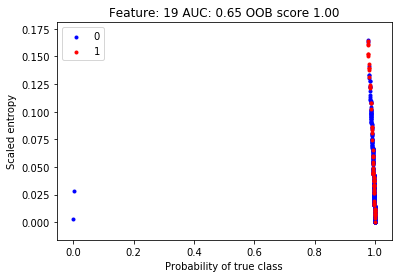

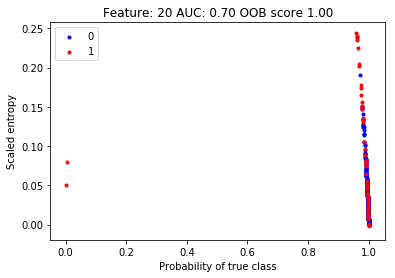

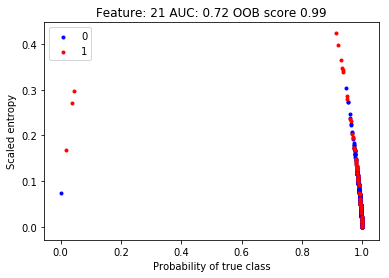

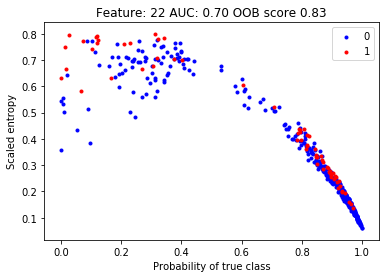

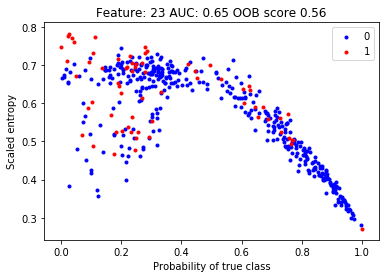

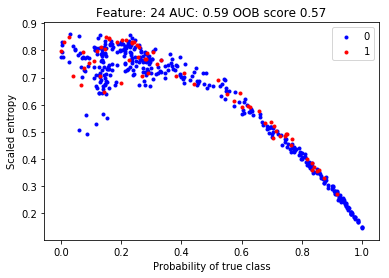

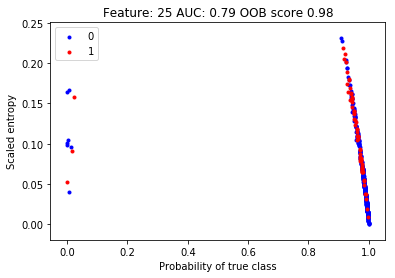

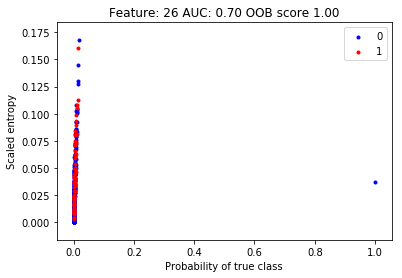

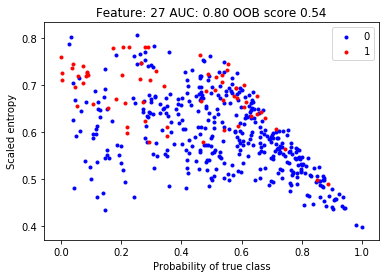

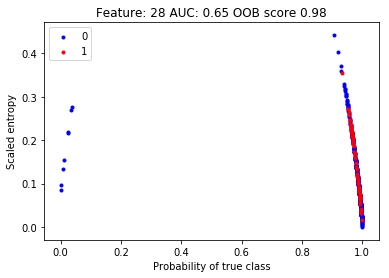

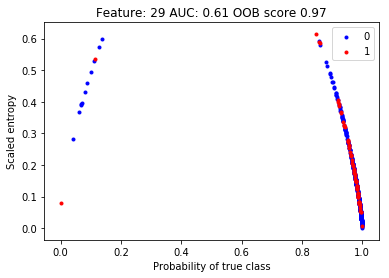

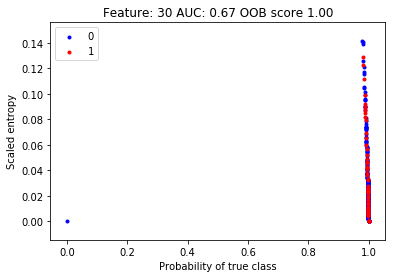

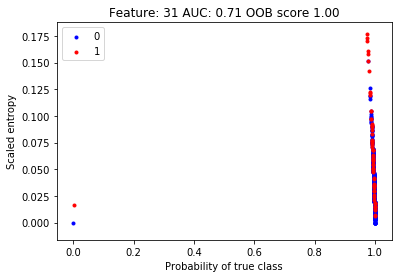

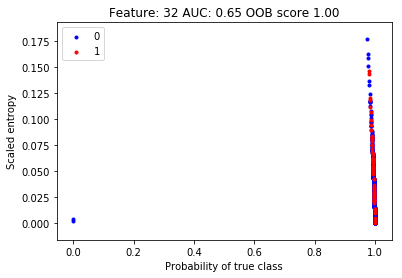

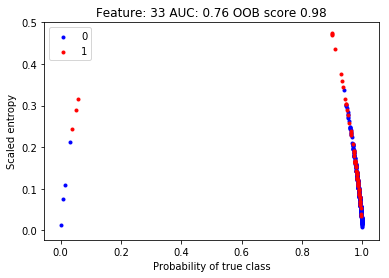

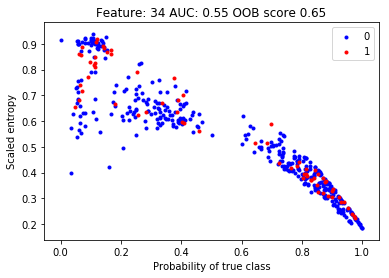

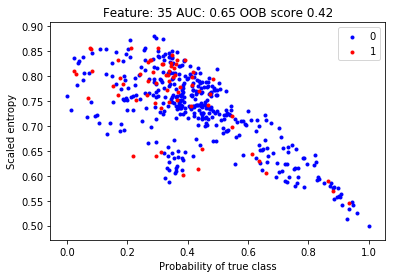

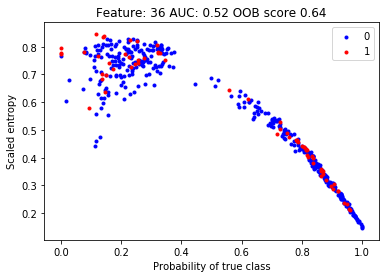

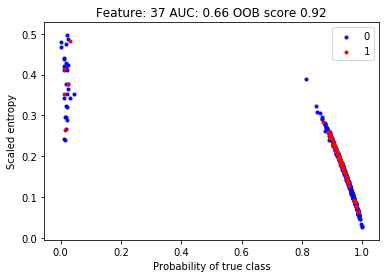

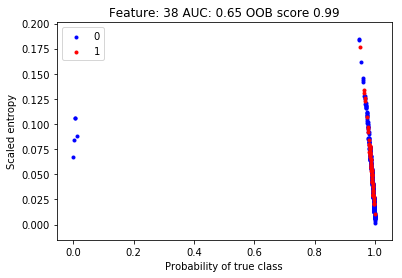

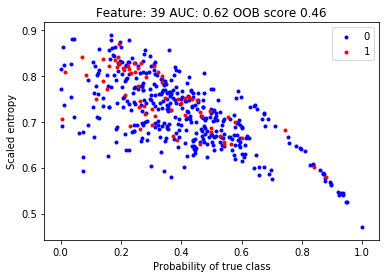

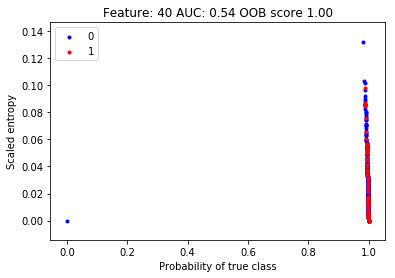

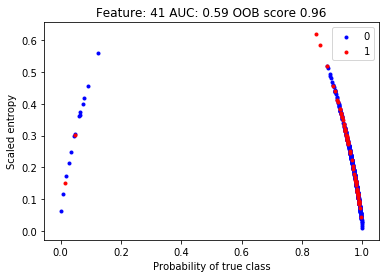

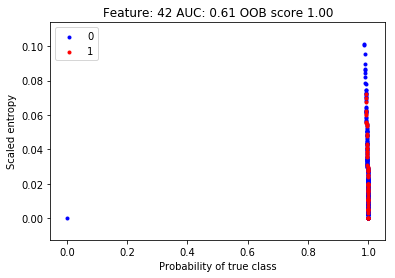

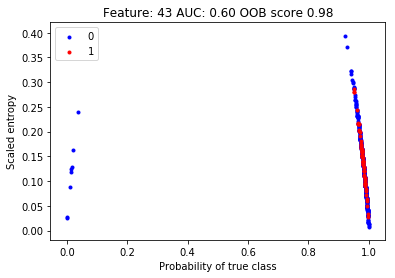

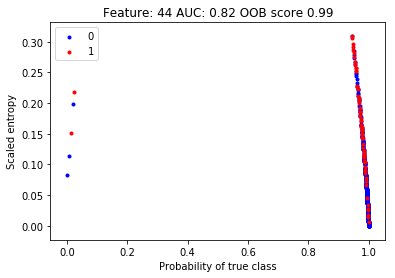

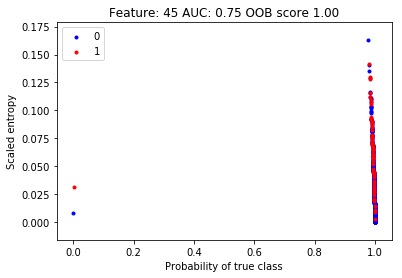

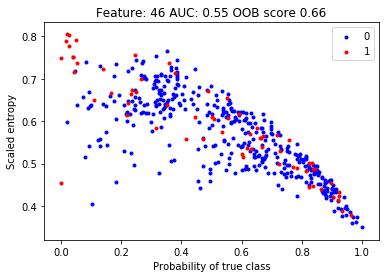

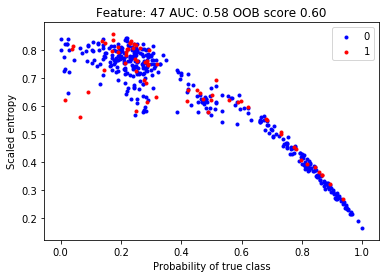

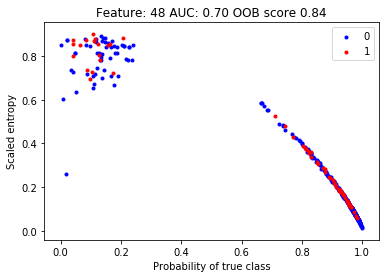

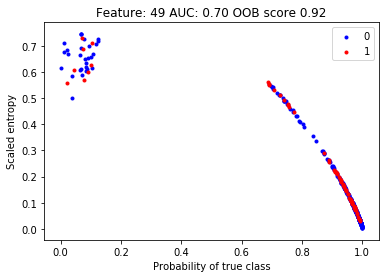

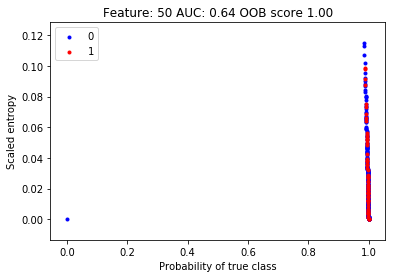

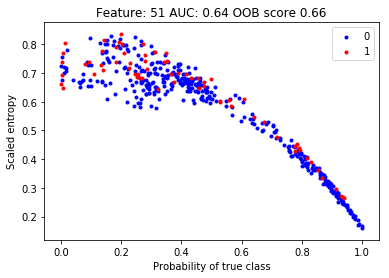

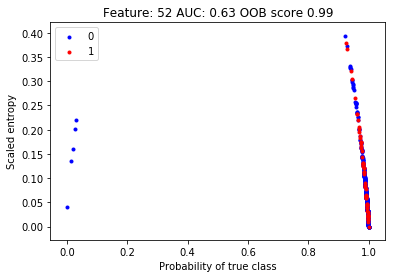

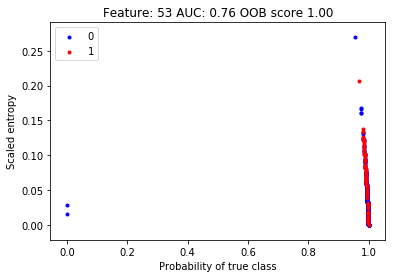

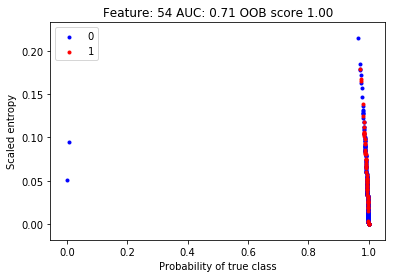

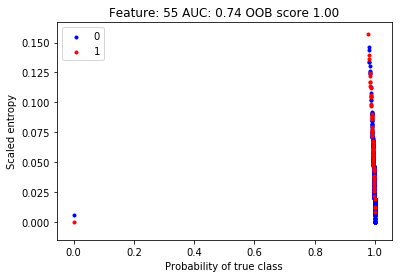

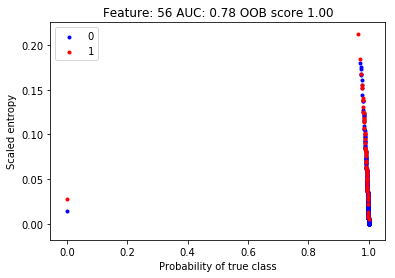

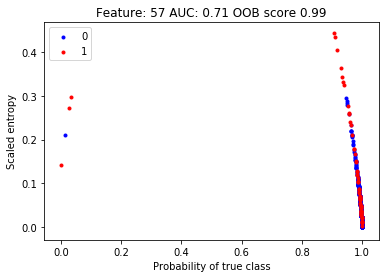

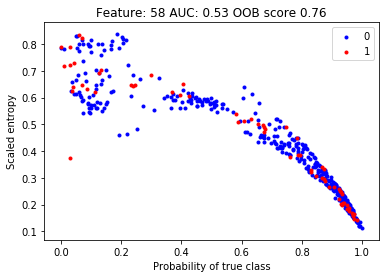

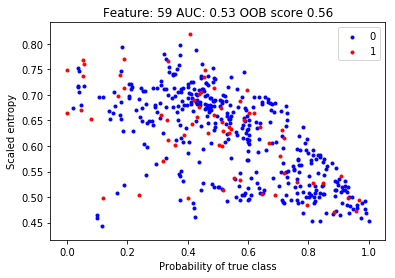

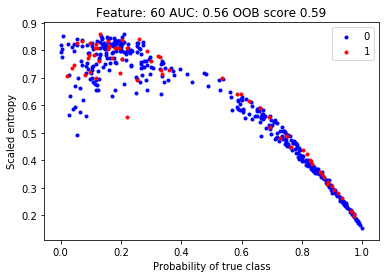

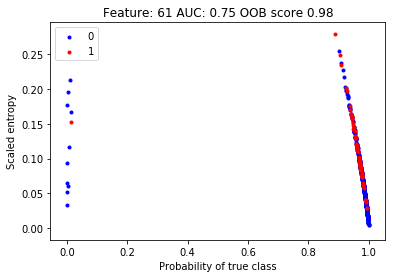

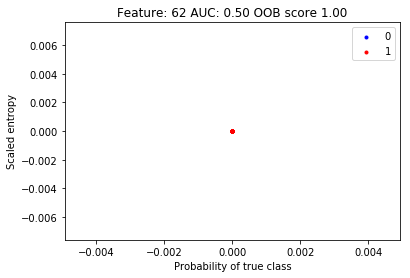

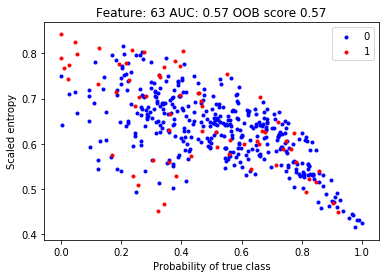

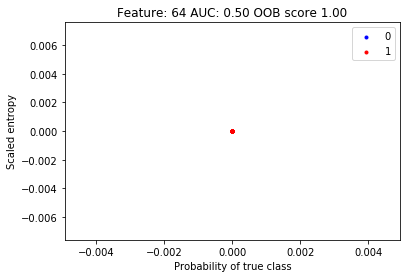

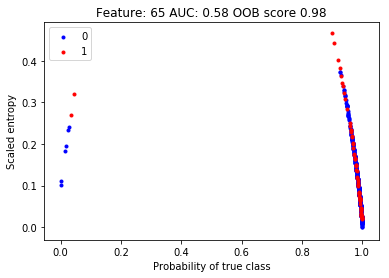

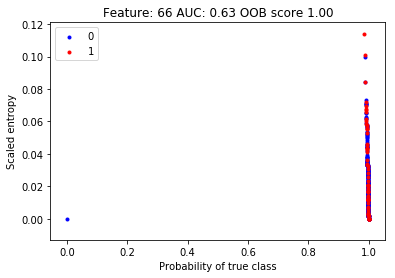

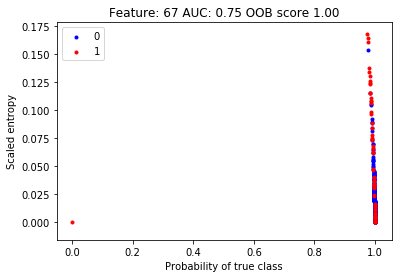

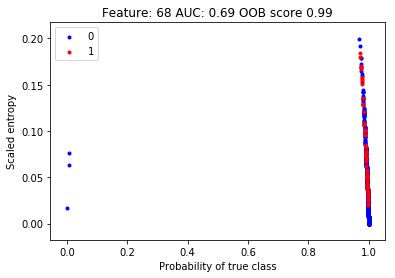

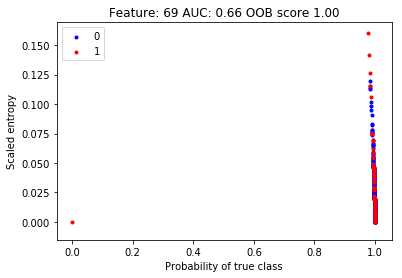

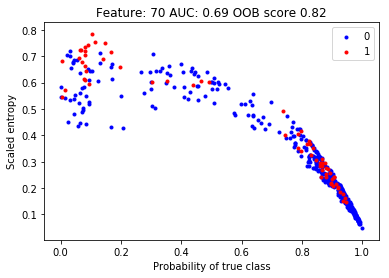

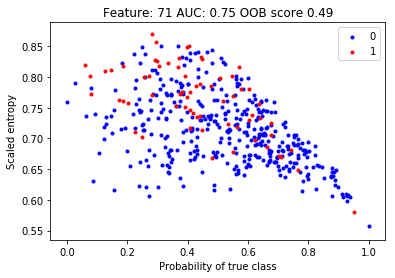

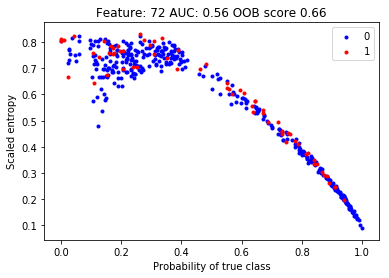

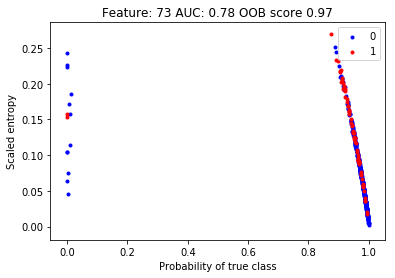

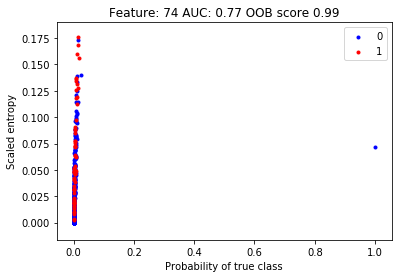

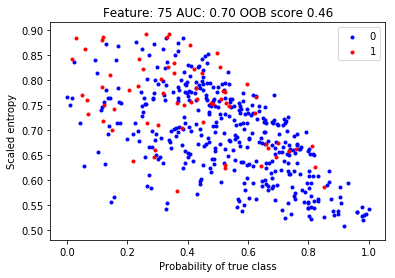

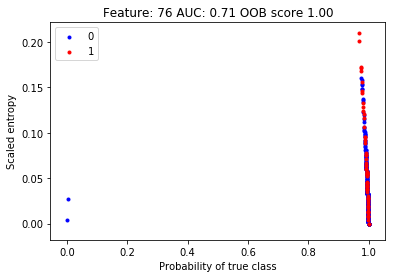

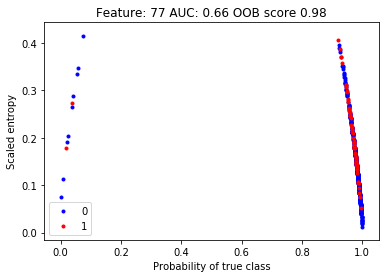

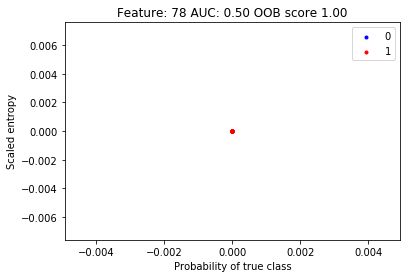

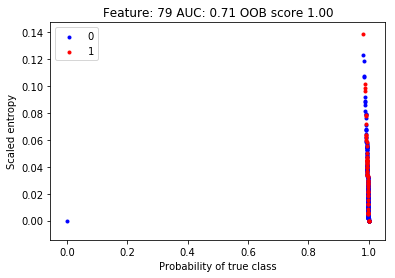

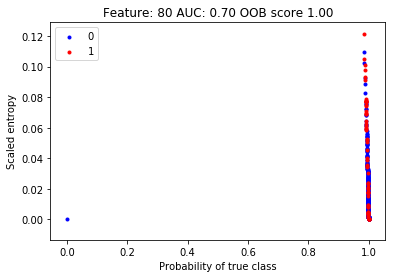

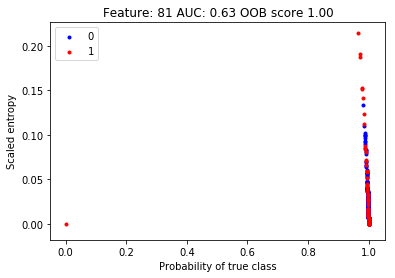

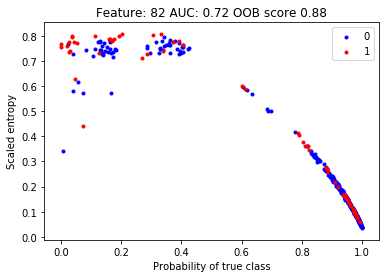

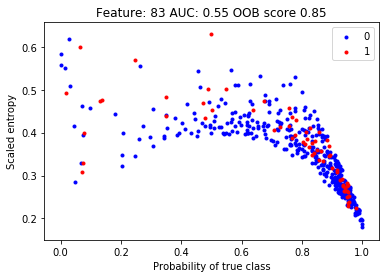

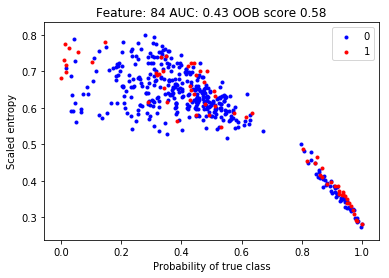

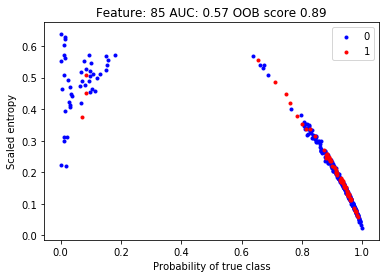

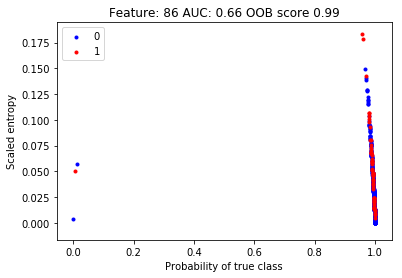

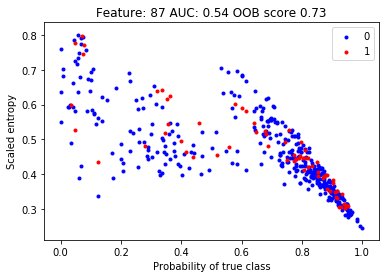

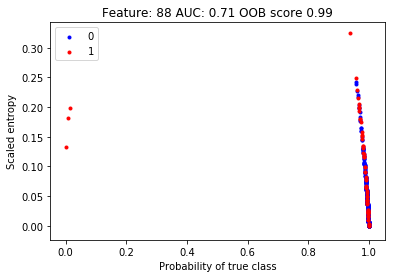

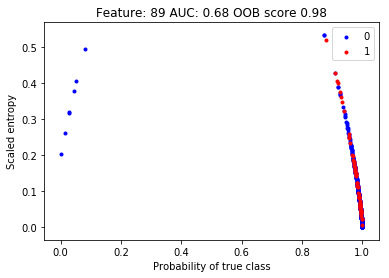

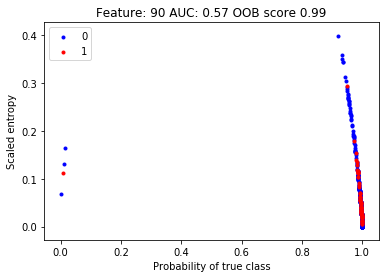

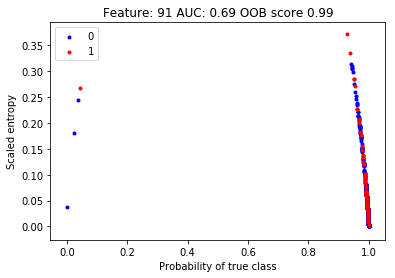

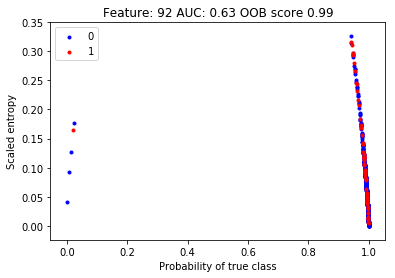

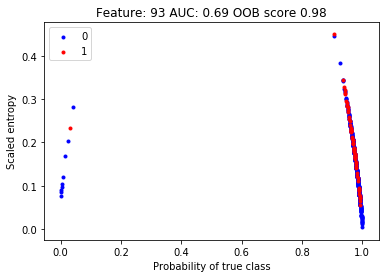

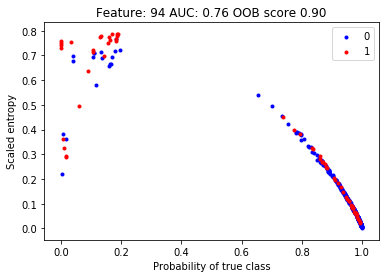

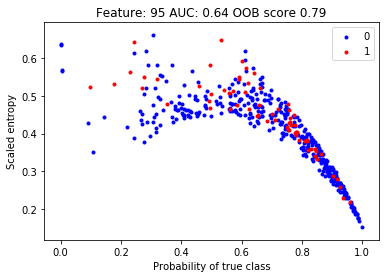

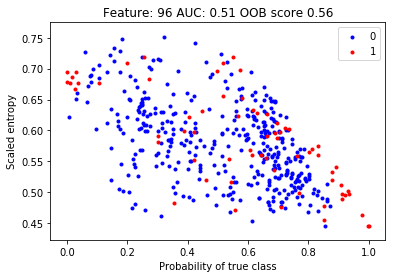

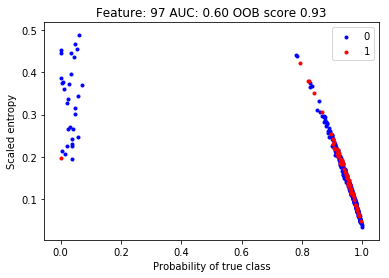

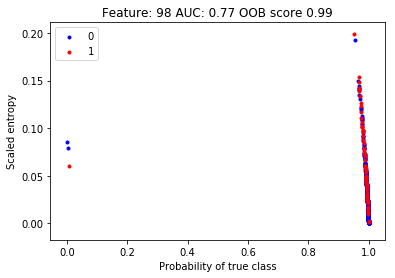

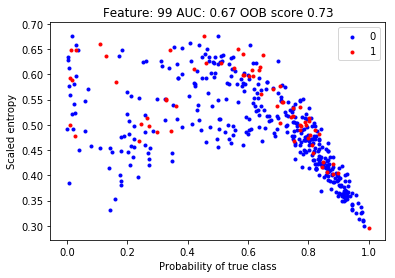

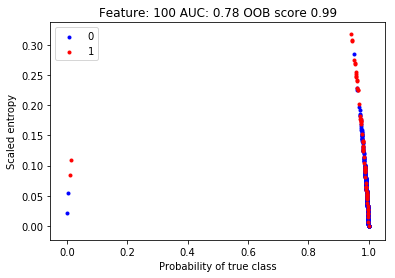

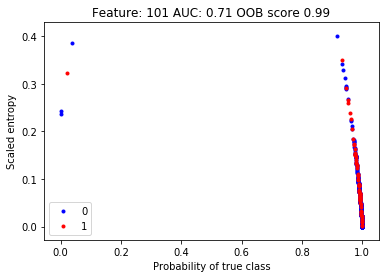

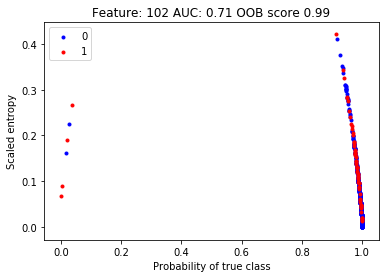

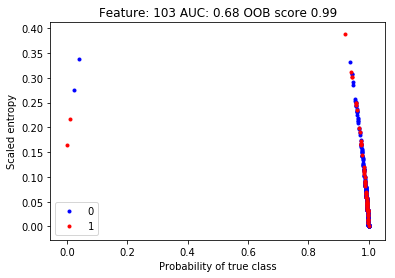

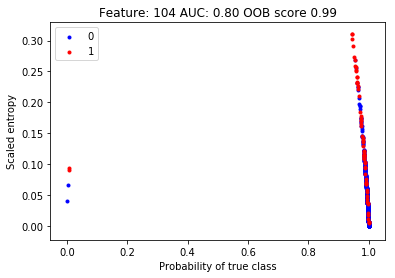

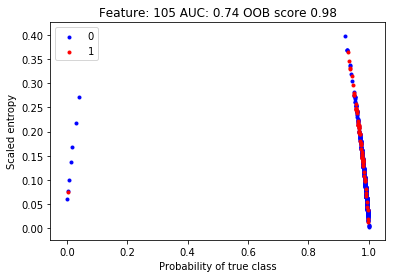

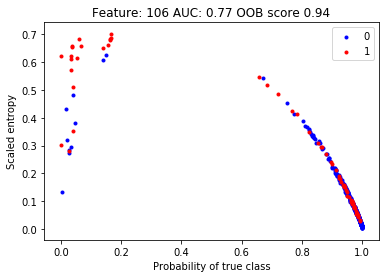

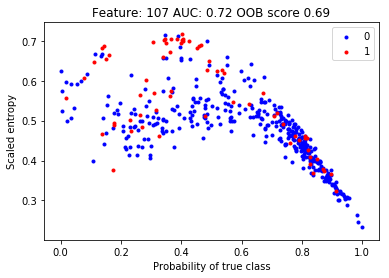

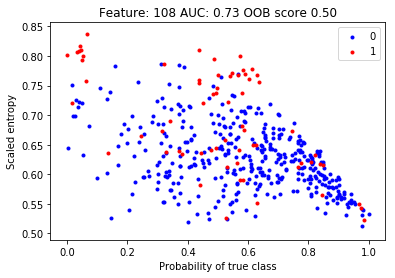

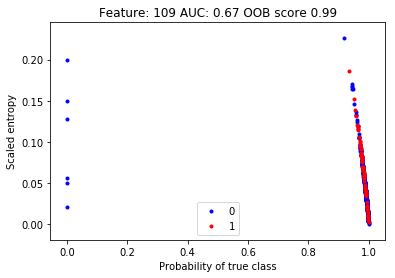

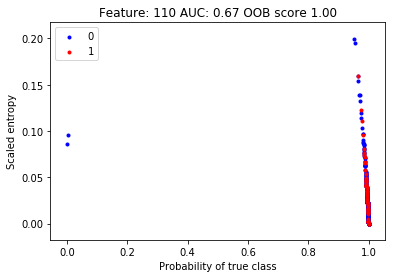

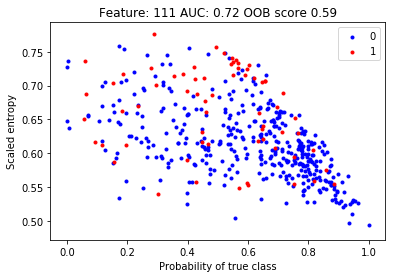

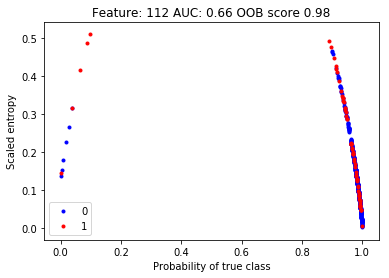

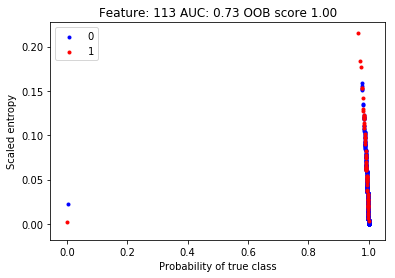

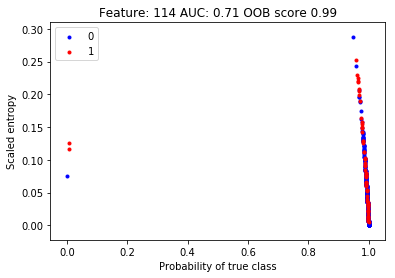

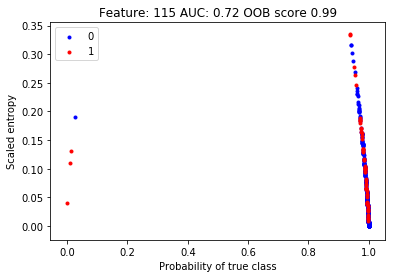

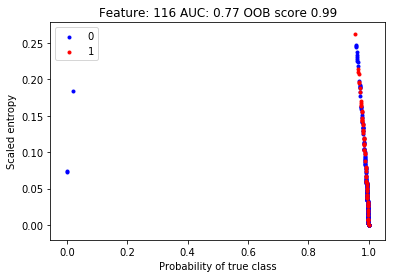

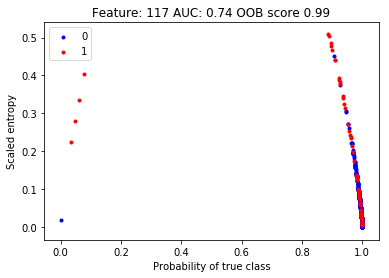

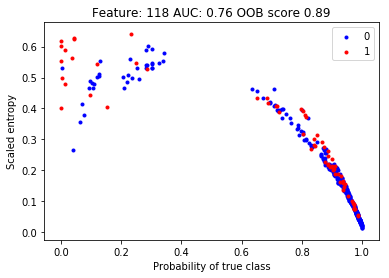

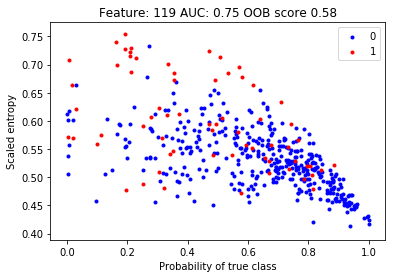

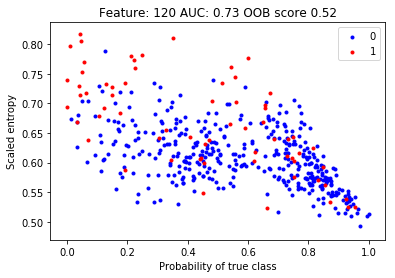

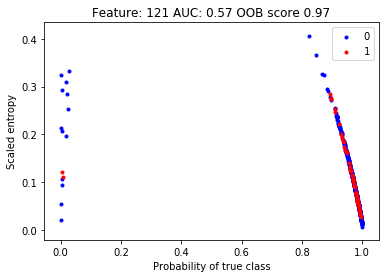

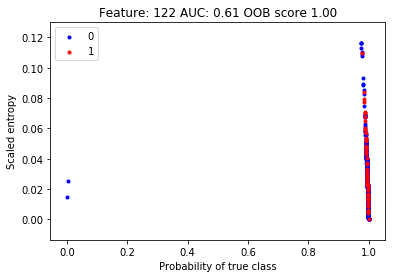

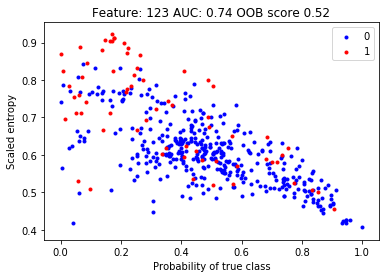

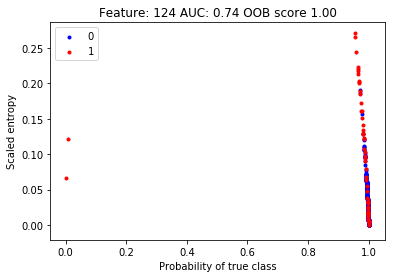

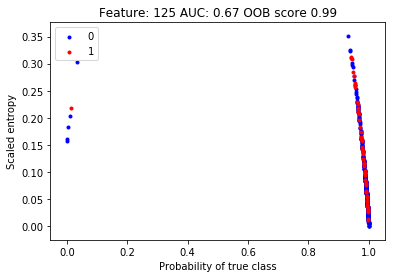

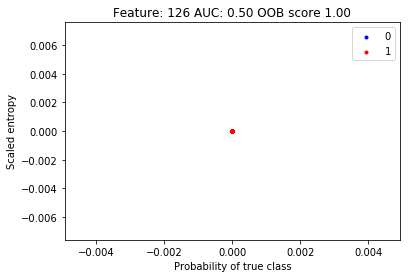

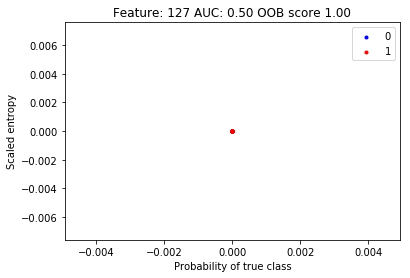

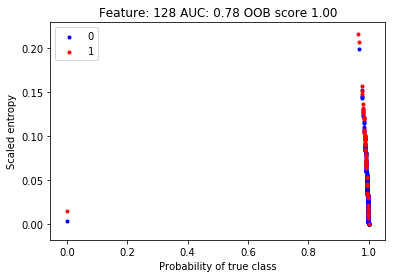

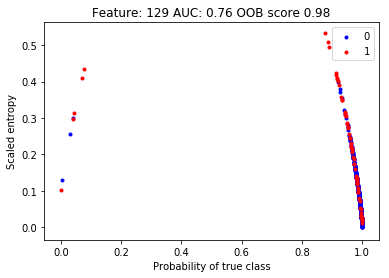

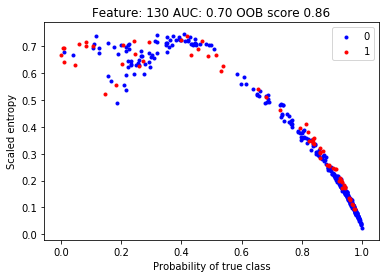

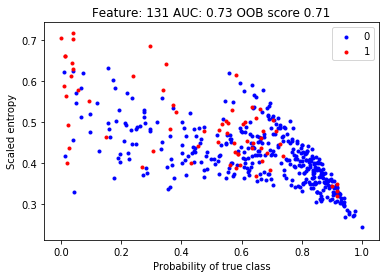

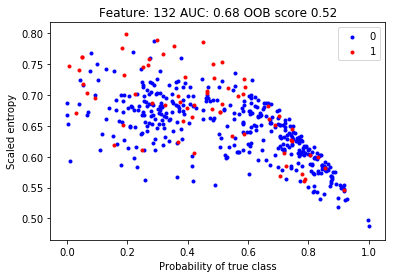

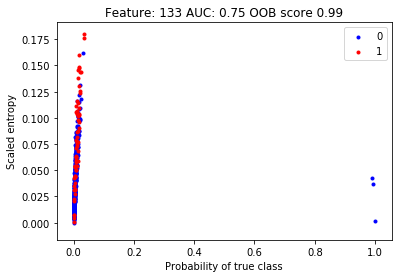

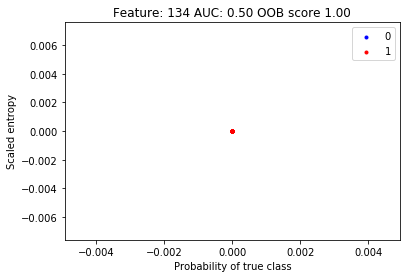

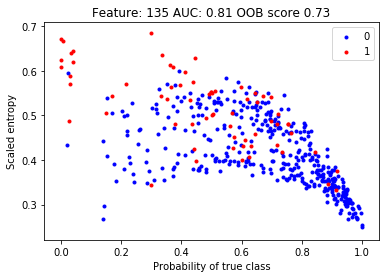

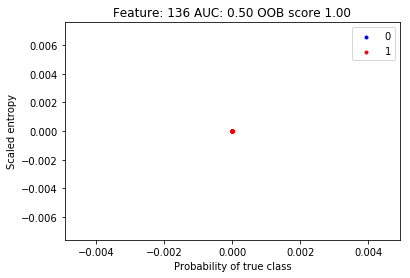

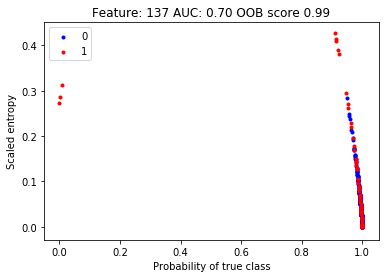

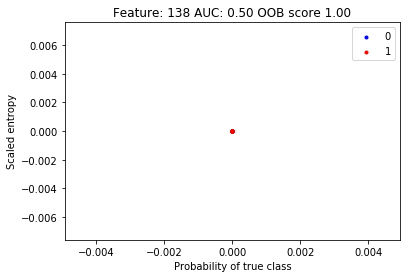

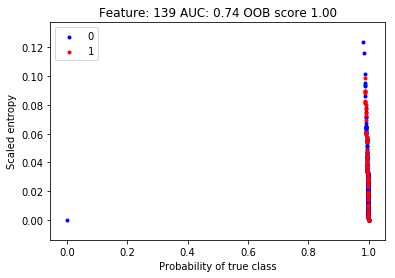

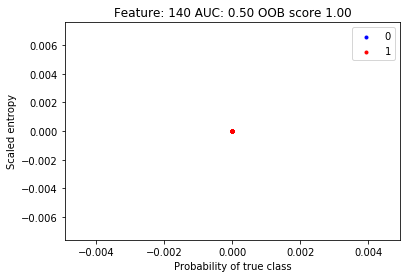

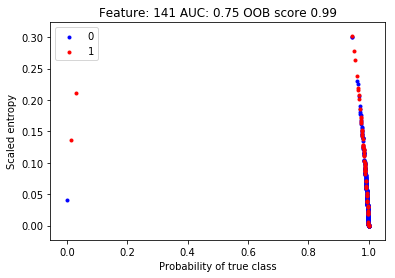

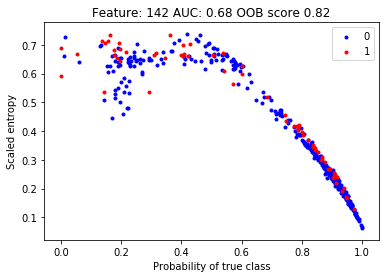

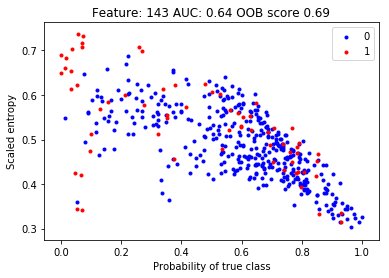

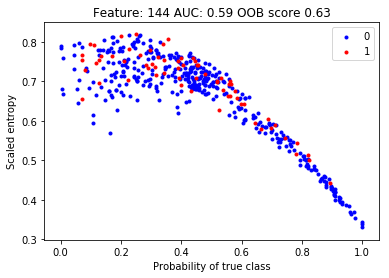

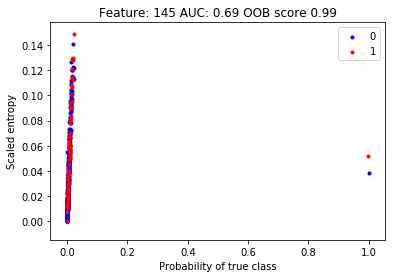

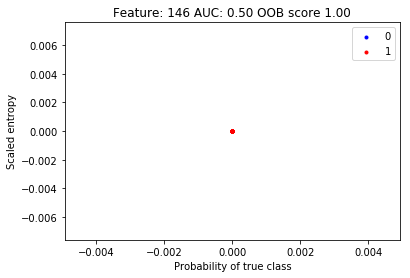

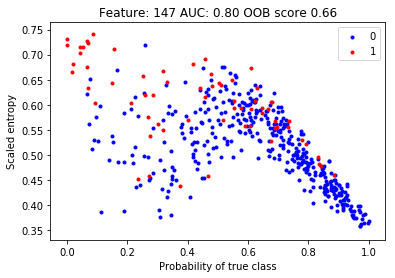

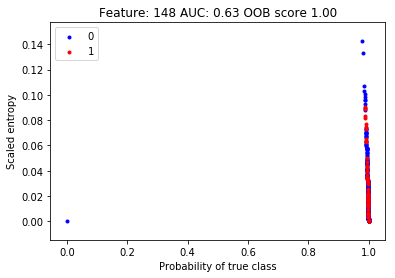

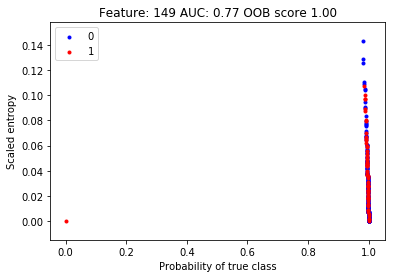

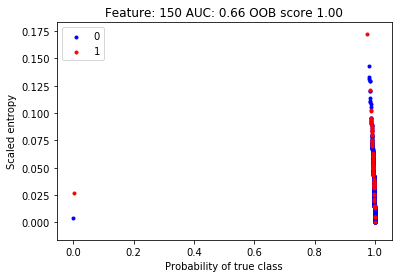

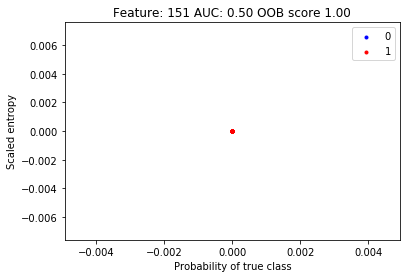

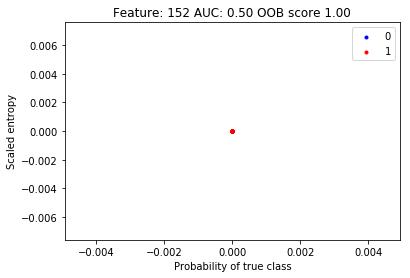

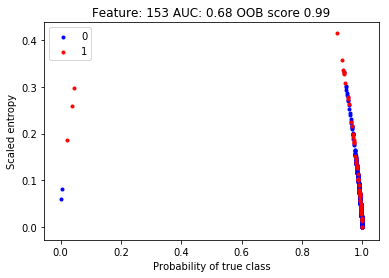

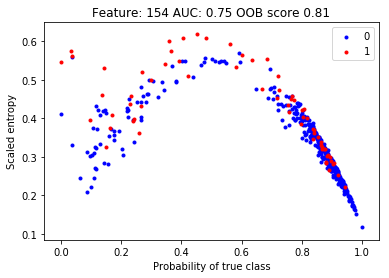

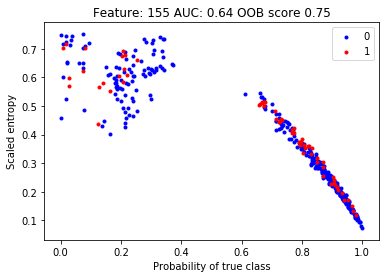

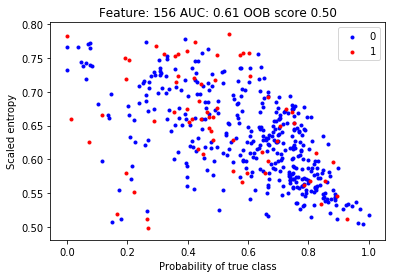

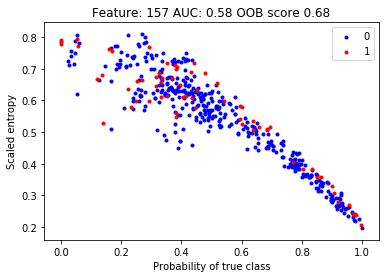

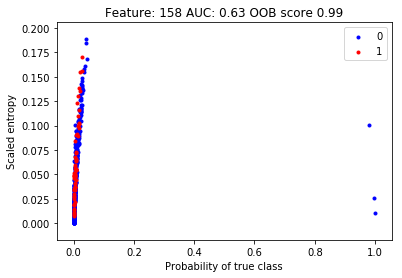

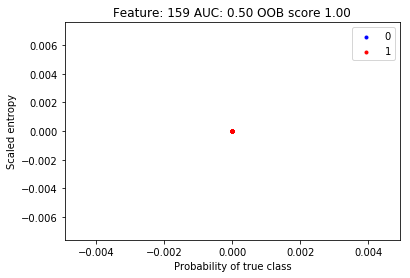

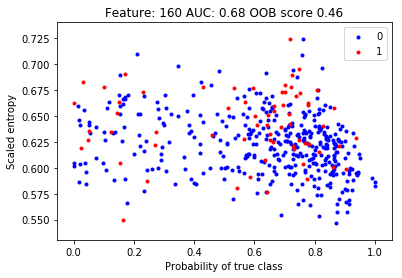

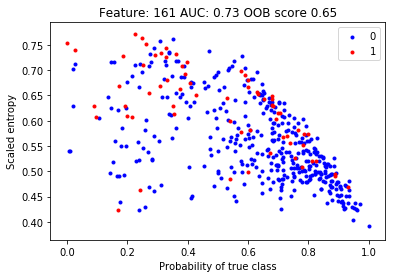

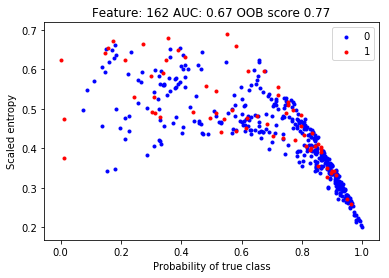

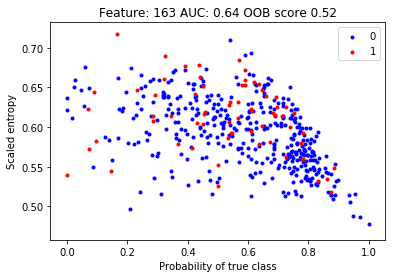

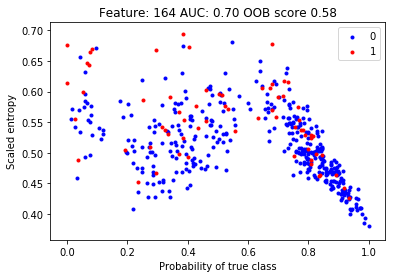

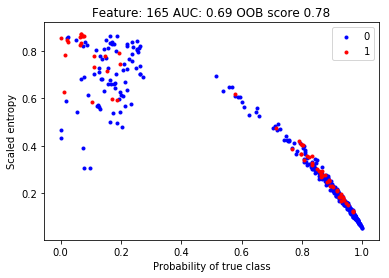

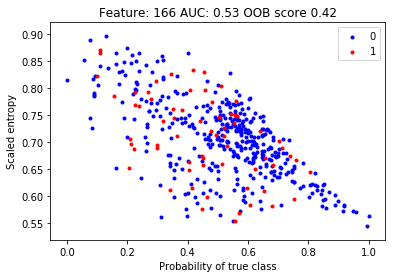

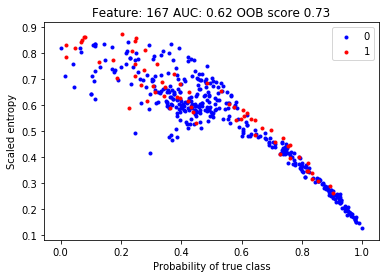

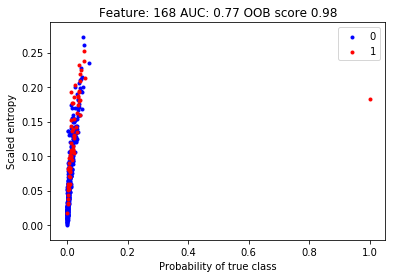

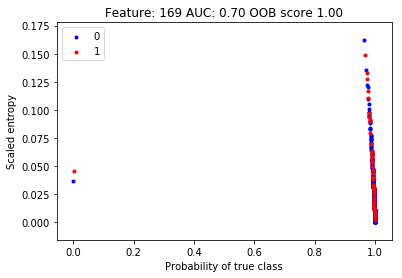

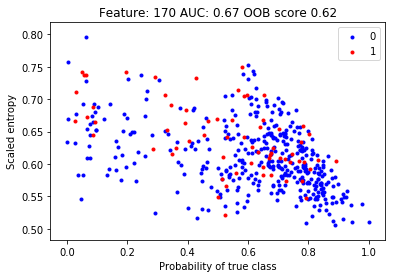

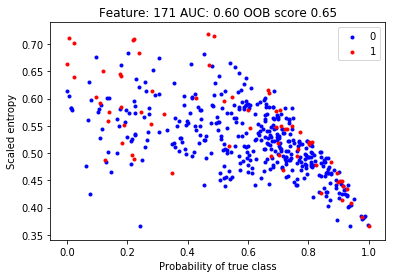

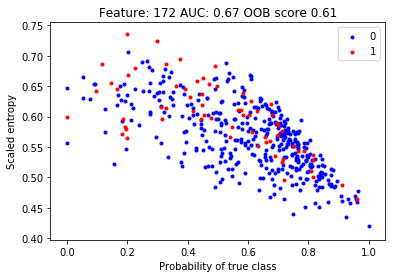

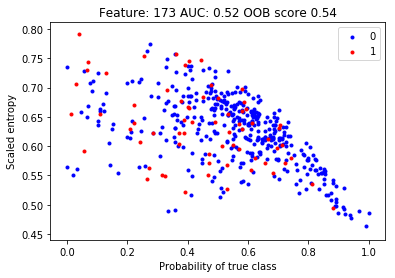

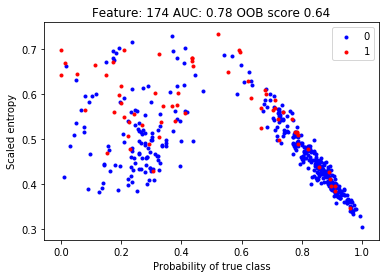

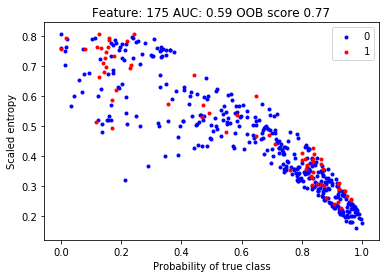

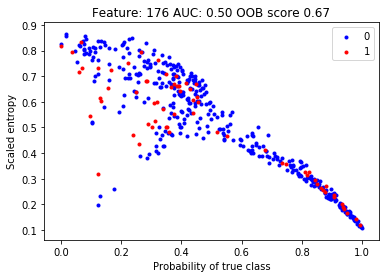

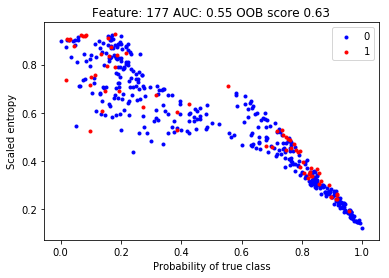

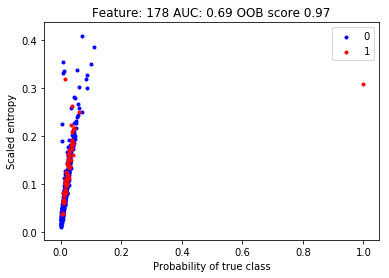

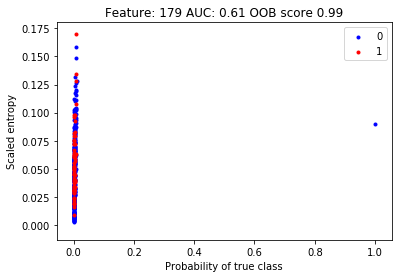

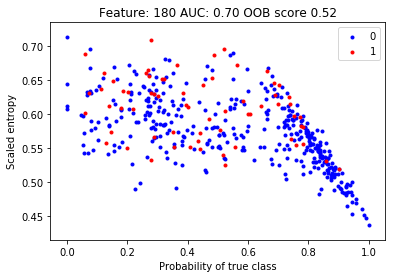

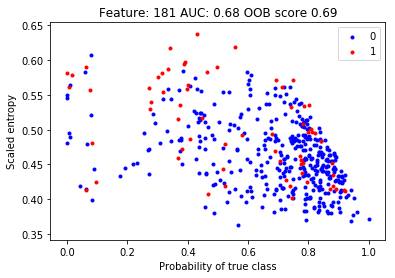

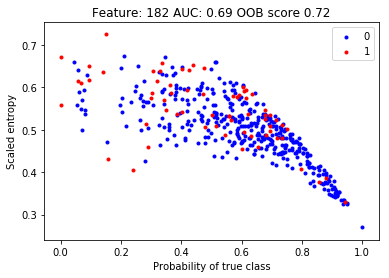

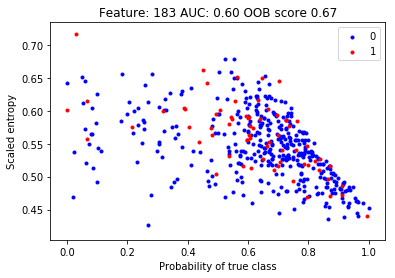

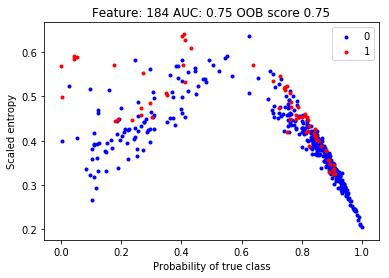

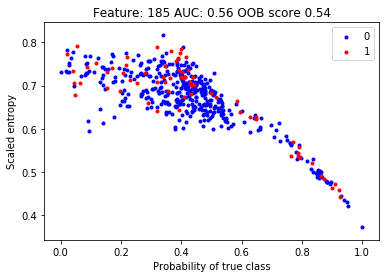

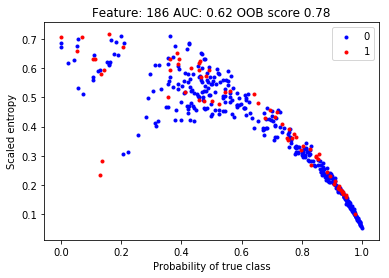

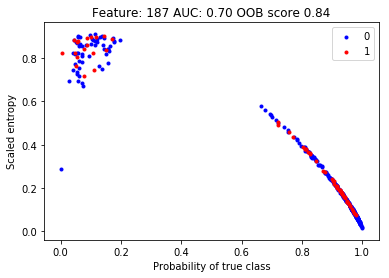

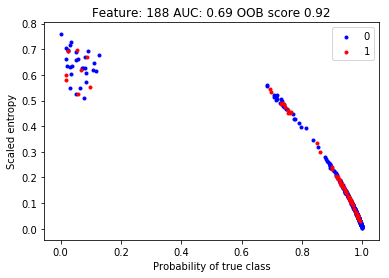

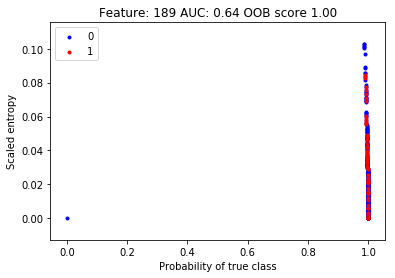

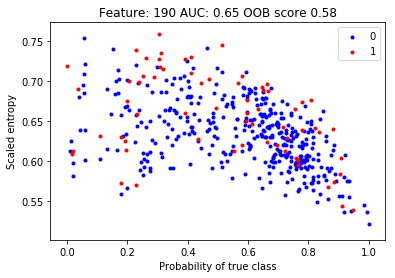

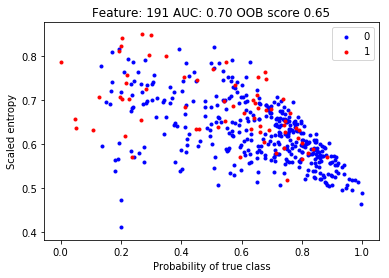

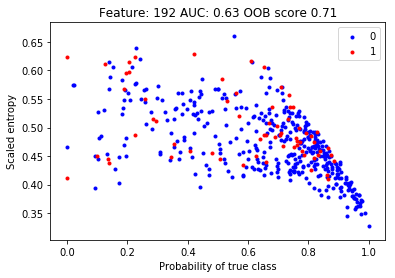

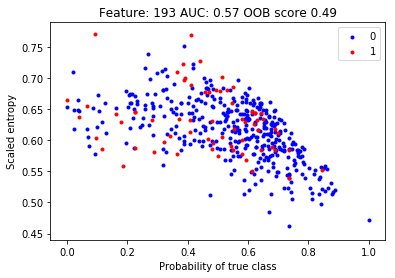

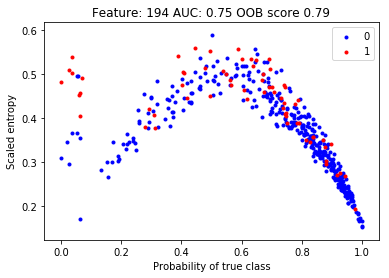

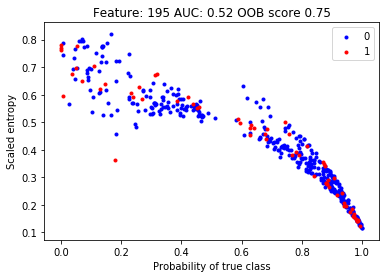

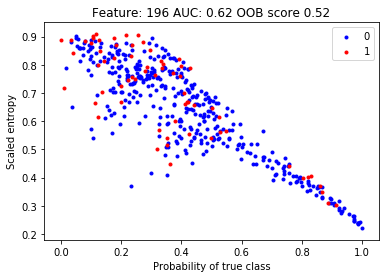

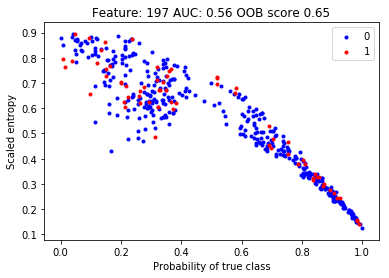

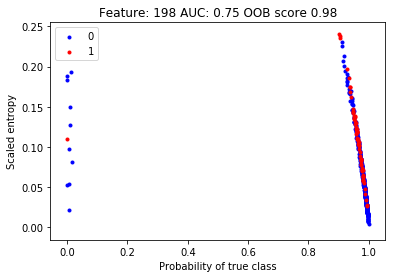

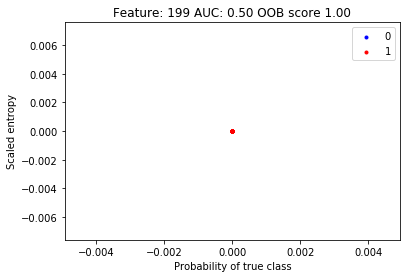

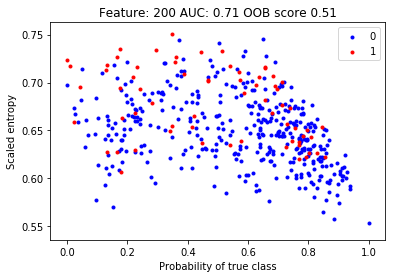

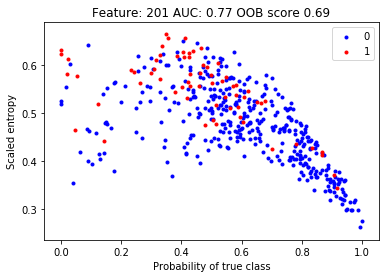

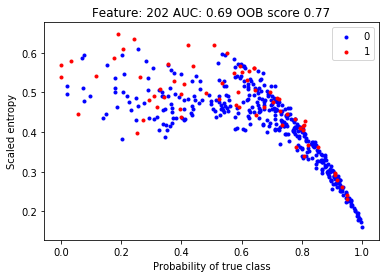

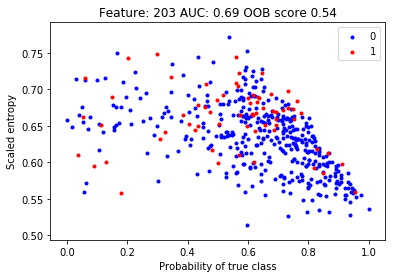

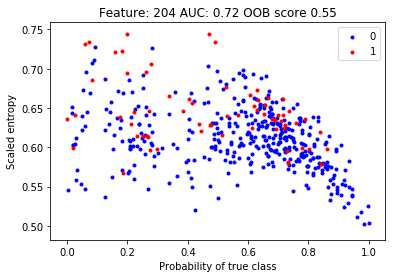

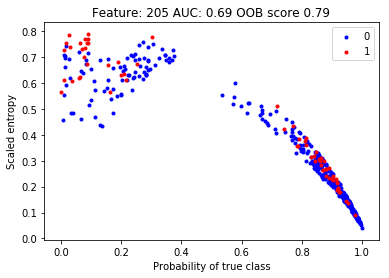

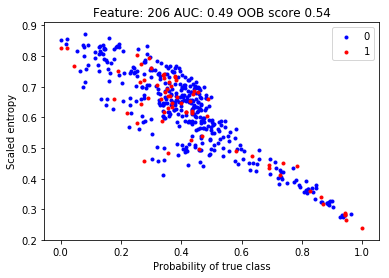

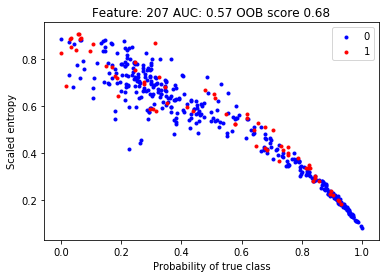

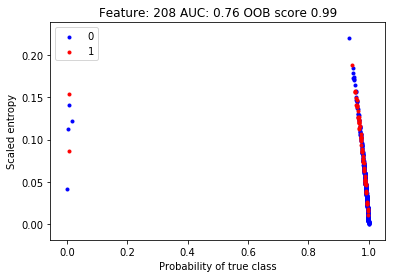

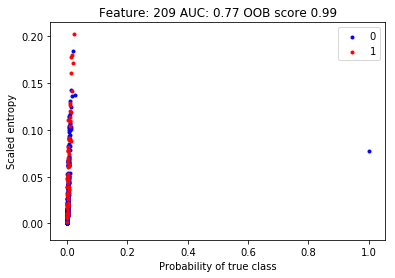

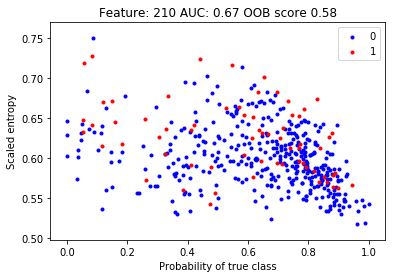

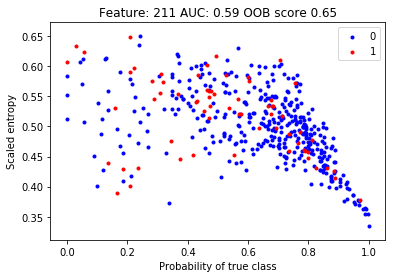

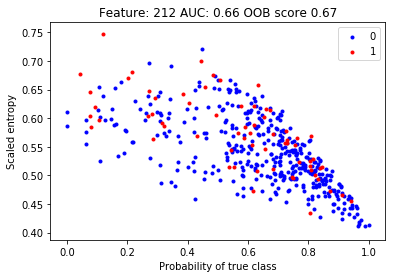

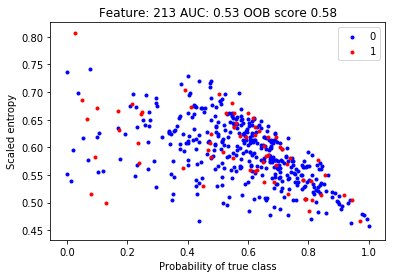

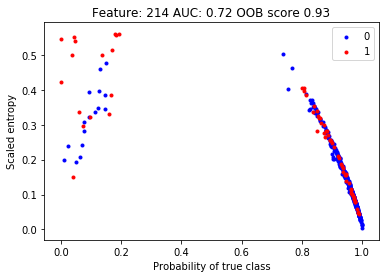

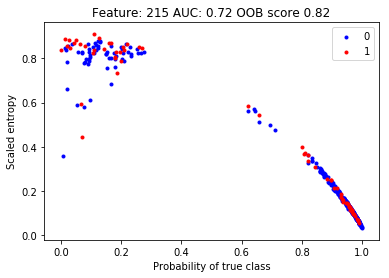

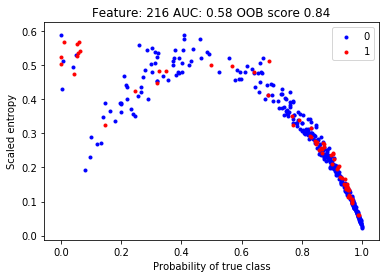

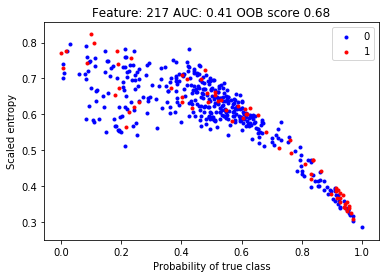

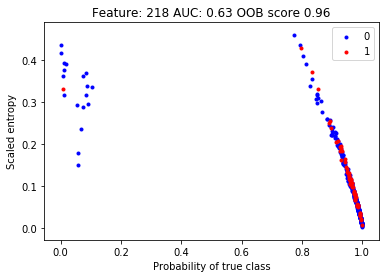

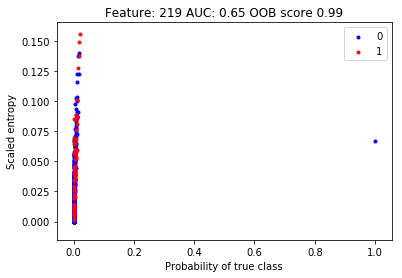

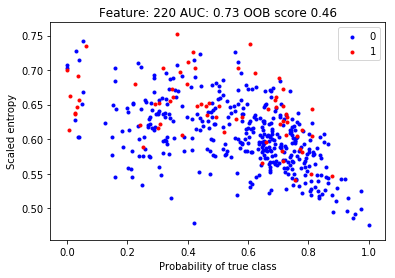

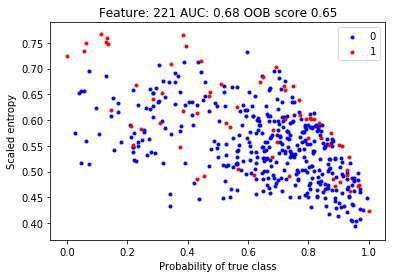

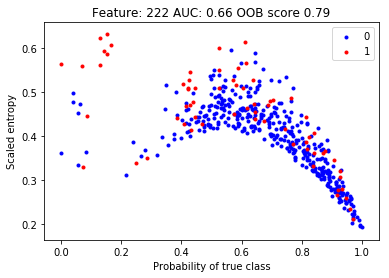

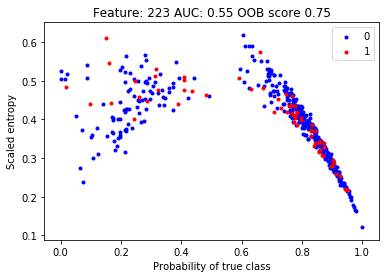

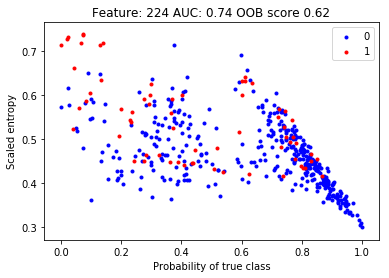

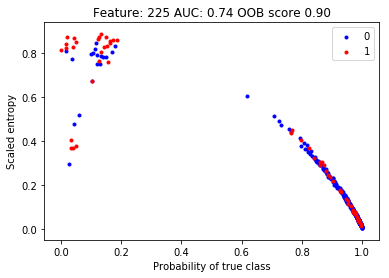

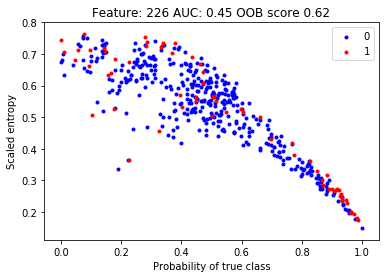

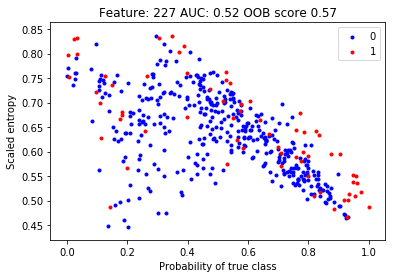

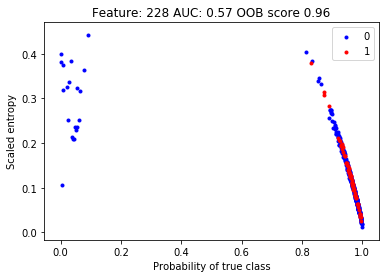

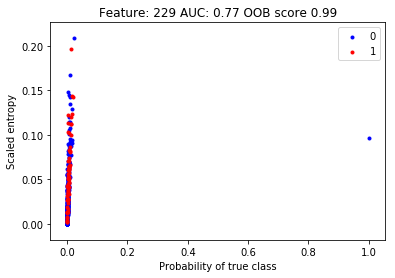

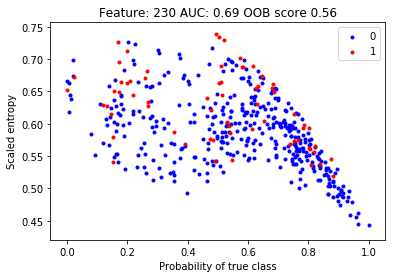

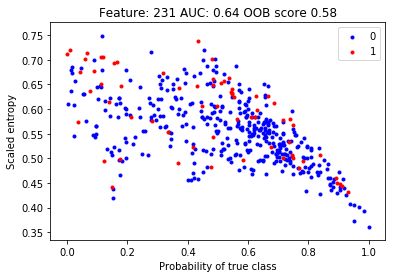

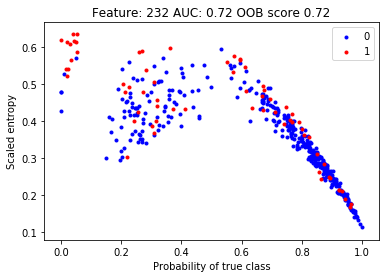

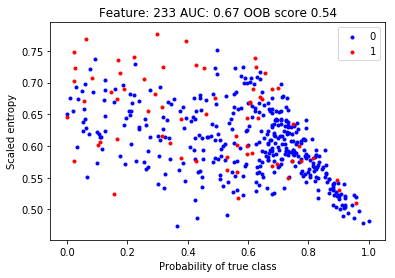

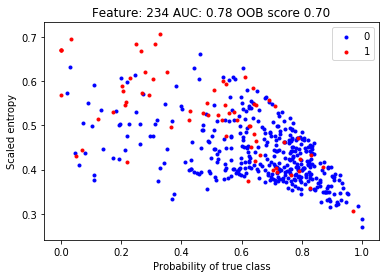

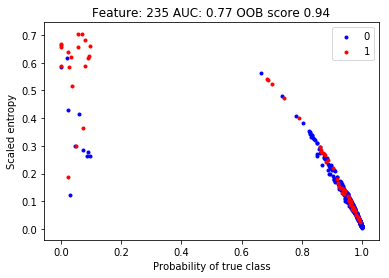

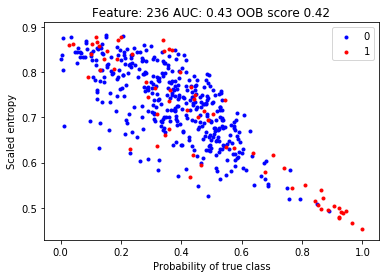

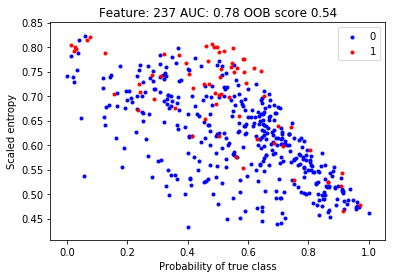

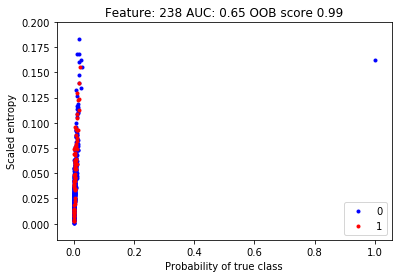

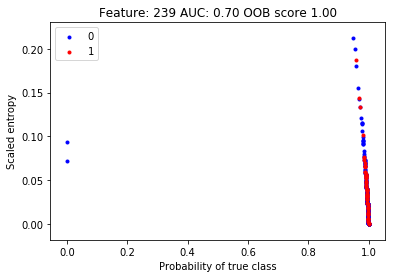

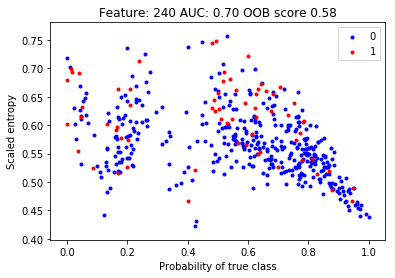

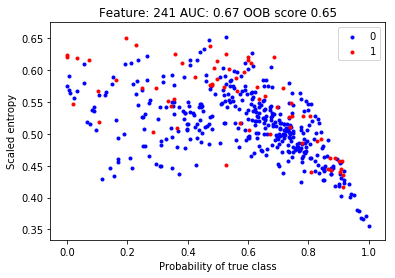

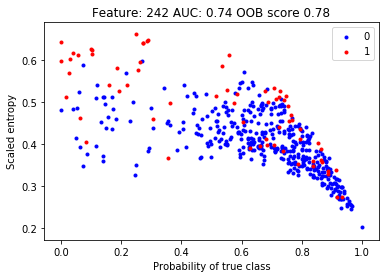

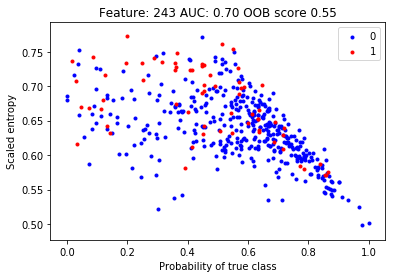

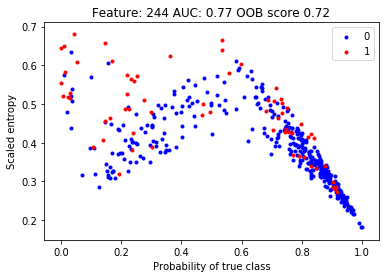

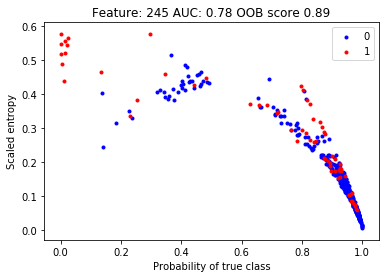

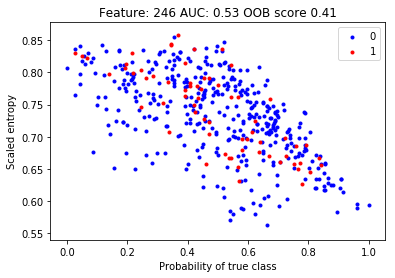

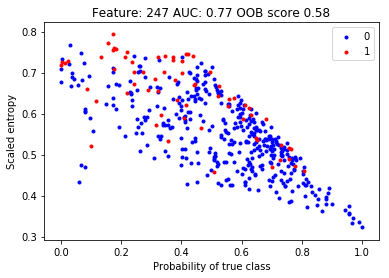

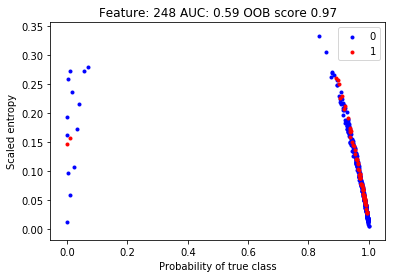

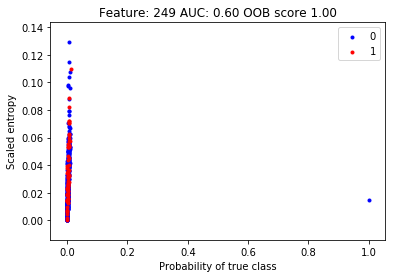

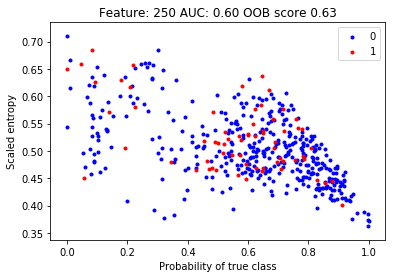

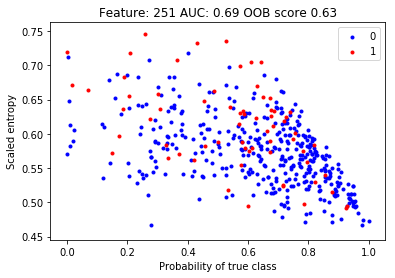

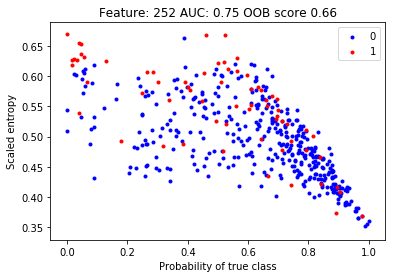

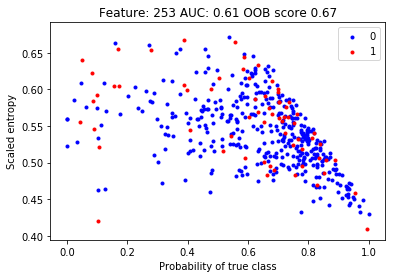

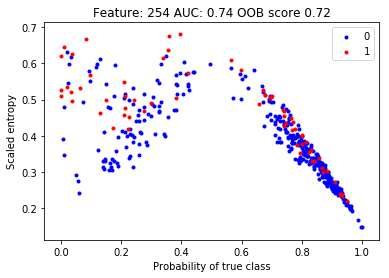

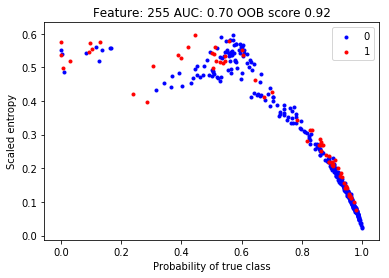

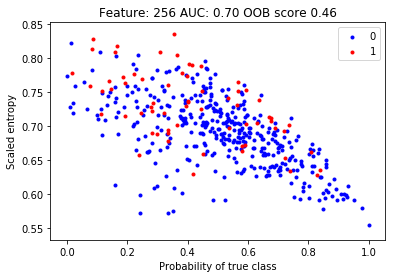

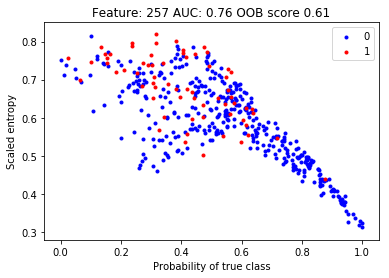

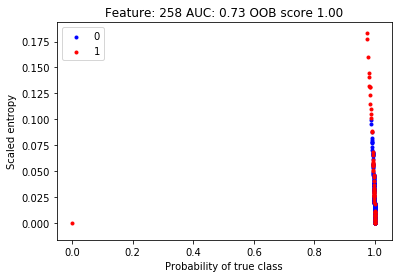

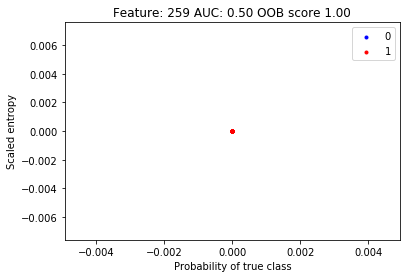

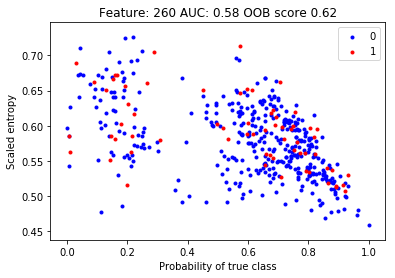

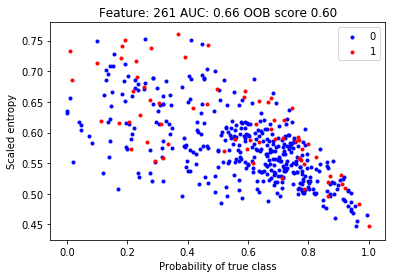

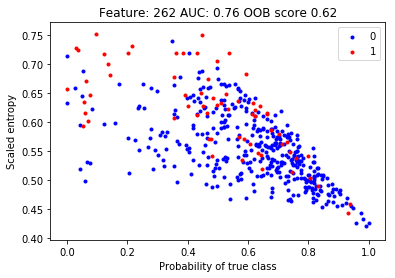

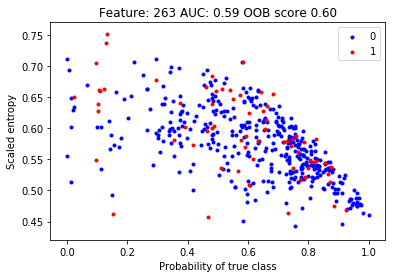

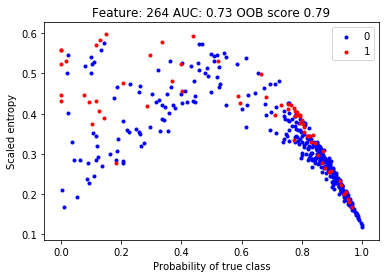

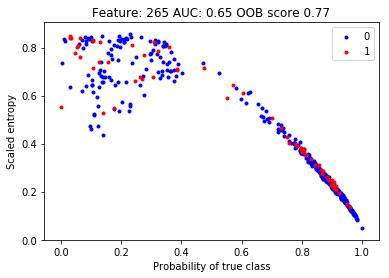

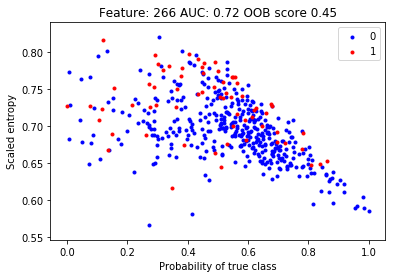

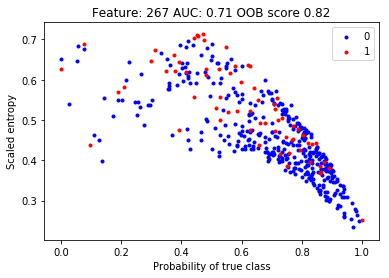

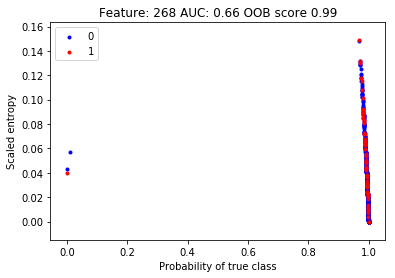

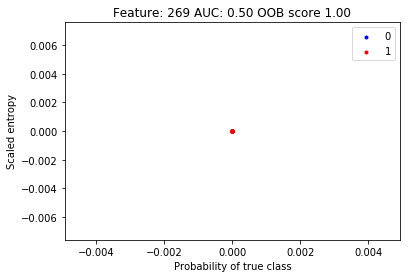

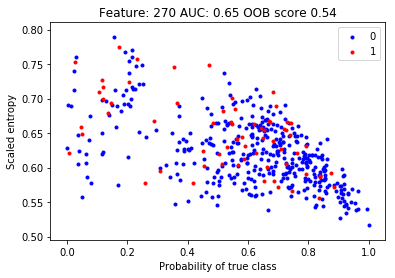

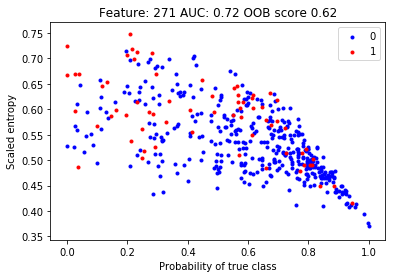

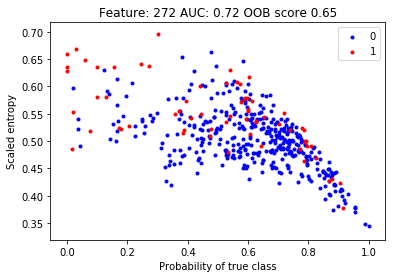

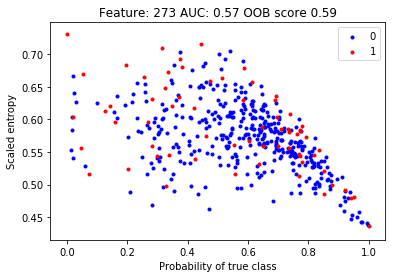

In [26]:
bins=10
results_dict={}
classifier_oob_score = defaultdict(list)
auc_classifier_feature = defaultdict(list)
classifier_dict = {}
oob_scores_dict = {}
model_type="Decision Tree"
results_pd['y']=pd.Series(x['y'].flatten())
oob_scores_list = []
min_leaf_node = int(x['y'].shape[0]*0.04)
for feature_index in range(x['X'].shape[1]):
    y=x['X'][:, feature_index]
    copy=x['X']
    train=np.delete(copy, [feature_index], axis=1)


    y = np.digitize(y, bins=np.histogram(y, bins=bins)[1])
    classifier = RandomForestClassifier(oob_score=True, 
                                  n_estimators=500, bootstrap=True, n_jobs=-1,
                                criterion='entropy', min_samples_leaf=min_leaf_node)
    classifier.fit(train, y)
    oob_score = classifier.oob_score_


    y_map={value: list(set(y.flatten())).index(value)  for value in set(y.flatten())}

    probability_scores=[[classifier.oob_decision_function_[index,:][y_map[element]], element]
     for index, element in enumerate(y.flatten())]

    prob_np=np.array(probability_scores)



    num_classes=np.unique(y).shape[0]
    if num_classes>1:
        max_entropy = np.log(num_classes)
    else:
        max_entropy = 1
        
    entropy = np.array([sum([-value*np.log(value+10**(-8)) for value in ls]) for ls in classifier.oob_decision_function_])/max_entropy

    fpr, tpr, thresholds = metrics.roc_curve(results_pd['y'], entropy, pos_label=1)
    auc_value = metrics.auc(fpr, tpr)
    auc_classifier_feature[feature_index].append(auc_value)
    results_pd["prob_{}".format(feature_index)]=pd.Series(minmax_scale(prob_np[:, 0]))

    results_pd["entropy_{}".format(feature_index)]=pd.Series(entropy)
    plt.scatter(results_pd[results_pd.y!=1]["prob_{}".format(feature_index)], 
                results_pd[results_pd.y!=1]["entropy_{}".format(feature_index)], marker='.', color='b',
                label="0")
    plt.scatter(results_pd[results_pd.y==1]["prob_{}".format(feature_index)], 
                results_pd[results_pd.y==1]["entropy_{}".format(feature_index)],
                marker='.', color='r', label="1")
    plt.legend()
    plt.xlabel('Probability of true class')
    plt.ylabel("Scaled entropy")
    plt.title("Feature: {} AUC: {:.2f} OOB score {:.2f}".format(feature_index, auc_value, oob_score))
    oob_scores_dict[feature_index] = oob_score
    results_dict[feature_index] = results_pd
    plt.show()

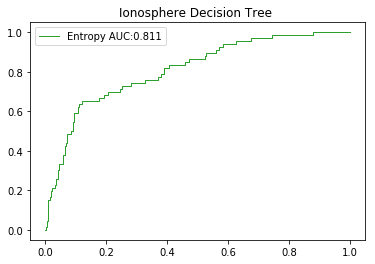

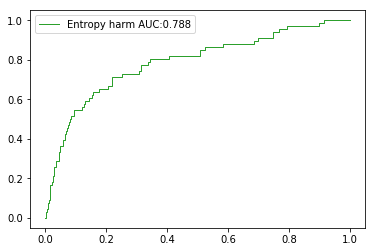

In [27]:
columns_list_entropy=["entropy_{}".format(index) for index in range(x['X'].shape[1])]
plt.title("Ionosphere {} ".format(model_type))
results_pd['entropy_sum']=(results_pd[columns_list_entropy]).sum(axis=1)/x['X'].shape[1]

abs_diff_harmonic=results_pd[columns_list_entropy].apply(np.log).sum(skipna=True, axis=1).replace(-np.inf, -1000).replace(np.inf, 1000)
results_pd['entropy_agg_harmonic_sum']=pd.Series(minmax_scale(abs_diff_harmonic.values))
fpr, tpr, thresholds = metrics.roc_curve(labels, results_pd['entropy_sum'], pos_label=1)
plt.plot(fpr, tpr, lw=1, label="Entropy AUC:{:.3}".format(metrics.auc(fpr, tpr)), color='C{}'.format(2))
plt.legend()
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(labels, results_pd['entropy_agg_harmonic_sum'], pos_label=1)
plt.plot(fpr, tpr, lw=1, label="Entropy harm AUC:{:.3}".format(metrics.auc(fpr, tpr)), color='C{}'.format(2))
plt.legend()s
plt.show()